In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from decimal import Decimal
import os

In [171]:
#status = pd.read_csv("echidna_clone_status.8.1.24.csv", index_col=0).dropna().T
#status.columns = ["echid_status_8.1.24"]

In [172]:
#ip = pd.read_csv("var_exp_mt.csv", index_col=0).dropna()

In [337]:
status.to_csv("echidna_clone_status.csv")

In [2]:
PATH = "hmm_all_pt/"
status = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        pt_st = pd.read_csv(PATH+patient+"/"+patient+"_status.csv", index_col=0)
        pt_st.index = [patient+"_"+str(i) for i in pt_st.index]
        pt_st.columns = [0]
        status = pd.concat((status, pt_st),axis=0)

In [19]:
PATH = "hmm_all_pt/"

import os
all_delta_eta = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        eta = pd.read_csv(PATH+patient+"/"+patient+"_delta_eta.csv", index_col=0)
        all_delta_eta = pd.concat((all_delta_eta, eta),axis=1)

In [4]:
import os
ip = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        pt_ip = pd.read_csv(PATH+patient+"/"+patient+"_gde.csv", index_col=0)
        pt_ip.columns = [patient+"_"+str(i) for i in pt_ip.columns]
        ip = pd.concat((ip, pt_ip),axis=1)

In [5]:
hvg_dict = {}
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        var = X.X.var(axis=0)
        thresh = np.quantile(var, 0.75)
        var = pd.DataFrame(var, index=X.var_names)
        hvg_dict[patient] = var[var[0]>thresh].index

In [6]:
cell_data = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        print(patient)
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        obs = X.obs
        cell_data = pd.concat((cell_data, obs[["echidna_clones", "echidna_status", "sample"]]))

F16
F03
F02
F12
R310
R319
F01


In [7]:
exp = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        obs = X.obs
        df = X.to_df()
        for clust in np.unique(obs["leiden"]):
            exp[patient+"_"+str(clust)] = df.loc[obs[obs.leiden==clust].index].mean(axis=0)

In [9]:
df = pd.DataFrame(exp.mean(axis=1)).sort_values(by=0)
genes = df[df[0]>.5].index
genes = np.intersect1d(genes, all_delta_eta.index)

In [10]:
degs = {}
for patient in os.listdir(PATH):
    if "_" not in patient:
        print(patient)
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        if "growing" in np.unique(X.obs["echidna_status"]):
            var = X.X.var(axis=0)
            thresh = np.quantile(var, 0.75)
            gene_filter = var > thresh
            X = X[:, gene_filter]
            sc.tl.rank_genes_groups(X, groupby="echidna_status", method='wilcoxon')
            deg = sc.get.rank_genes_groups_df(X, group="growing").sort_values(by="logfoldchanges",ascending=False)
            deg.index = deg["names"]
            degs[patient] = deg
        else:
            print("No growing clusters")

F16


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F03


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F02


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F12


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


R310


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


R319


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F01
No growing clusters


In [11]:
degs_shrinking = {}
for patient in os.listdir(PATH):
    if "_" not in patient:
        print(patient)
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        if "shrinking" in np.unique(X.obs["echidna_status"]):
            var = X.X.var(axis=0)
            thresh = np.quantile(var, 0.75)
            gene_filter = var > thresh
            X = X[:, gene_filter]
            sc.tl.rank_genes_groups(X, groupby="echidna_status", method='wilcoxon')
            deg = sc.get.rank_genes_groups_df(X, group="shrinking").sort_values(by="logfoldchanges",ascending=False)
            deg.index = deg["names"]
            degs_shrinking[patient] = deg
        else:
            print("No shrinking clusters")

F16


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F03


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F02


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F12


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


R310


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


R319


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F01


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [12]:
wouters = pd.read_csv("wouters_mel_sigs.csv")

/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_31952/1428436661.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

In [36]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths
def loll_that_pop(patient, condition, deg_dict, states, mode, n_genes=100, custom_left = None, custom_right=None, bw_adjust=.05, prominence=.5):
    deg_df = deg_dict[patient]
    deg_df.index = deg_df.names

    #subset to high variance genes and make sure all genes are present in all parameters
    inds = [i for i in hvg_dict[patient] if i in states.index]
    inds = [i for i in inds if i in exp.index]
    states = states.loc[inds]

    #subset and smooth eta
    plt.figure(figsize=(20,5))
    pt = all_delta_eta[[i for i in all_delta_eta.columns if patient in i]].loc[inds].T
    pt_gr = [i for i in pt.index if status.loc[i][0]==condition]
    pt_gr_et = pd.DataFrame(pt.loc[pt_gr].mean(axis=0), index = pt.columns)
    eta_smoothed = scipy.ndimage.gaussian_filter1d(pt_gr_et[0], sigma=20, radius=500)

    #subset expression data
    pt = exp[[i for i in all_delta_eta.columns if patient in i]].loc[inds].T
    pt_gr = [i for i in pt.index if status.loc[i][0]==condition]
    pt_gr_exp = pd.DataFrame(pt.loc[pt_gr].mean(axis=0), index = pt.columns)

    #subset gdx
    pt = ip[[i for i in all_delta_eta.columns if patient in i]].loc[inds].T
    pt_gr = [i for i in pt.index if status.loc[i][0]==condition]
    pt_gr_ip = pd.DataFrame(pt.loc[pt_gr].mean(axis=0), index = pt.columns)
    #pt_gr_ip = pt.loc[condition]
    
    #icr = np.intersect1d(list(wouters["Immune_resistance_wang"]), pt.columns)
    icr = ["S100A11","S100A6","S100A10","S100A1","PSMB4","PSMD4","ADAR","IL6R"]

    #get list of DEGs
    deg_df = deg_df[deg_df["pvals_adj"]<.05]
    if mode==1 or mode==0:    
        genes = deg_df[deg_df["logfoldchanges"]>0].sort_values(by="logfoldchanges", ascending=False).iloc[0:n_genes].index
    else:
        genes = deg_df[deg_df["logfoldchanges"]<0].sort_values(by="logfoldchanges", ascending=True).iloc[0:n_genes].index        
    genes = np.intersect1d(genes, inds)

    #construct density of DEGs, indexed across ALL HVGs (not just DEGs)
    density = []
    for gene in genes:
        density.append(list(pt_gr_exp.index).index(gene))
    #get max height of histogram bars
    counts, bin_edges, patches = plt.hist(density, bins=400)
    ax = sns.histplot(density, bins=300, kde=True, kde_kws=dict(bw_adjust=bw_adjust))
    # Extract KDE data
    kde_line = ax.get_lines()[0]  # The first line corresponds to the KDE
    kde_x = kde_line.get_xdata()
    kde_y = kde_line.get_ydata()
    
    plt.clf()   
  
    #scale max height for plotting
    scaling_factor = max(pt_gr_exp.loc[genes][0])/max(counts)
    #scaling_factor = max(pt_gr_exp.loc[genes])/max(counts)
    #print(max(counts), max(pt_gr_exp.loc[genes][0]), scaling_factor)
    weights = np.ones_like(density) * scaling_factor

    #plt.plot(kde_x, kde_y)
    plt.fill_between(kde_x, 0, kde_y, color='lightgrey')

    
    # Find peaks
    peaks, _ = find_peaks(kde_y, prominence=prominence)
    
    # Find peak widths
    results_full = peak_widths(kde_y, peaks, rel_height=0.5)  # Width at half prominence
    
    
    # Interpolated x-coordinates for the widths
    left_coords = results_full[2]
    right_coords = results_full[3]
    
    # Convert interpolated coordinates to indices
    left_indices = np.round(left_coords).astype(int)
    right_indices = np.round(right_coords).astype(int)


    #figure out which peaks correspond to amps
    hotspot_inds = []
    for i in range(len(left_coords)):
        if scipy.stats.mode(states[int(round(kde_x[left_indices[i]],0)):int(round(kde_x[right_indices[i]],0))])[0]==mode:
            
            hotspot_inds.append(i)
            
    peaks = peaks[hotspot_inds]
    left_indices = left_indices[hotspot_inds]
    right_indices = right_indices[hotspot_inds]


    if custom_left is not None:
        left_indices = list(left_indices)+custom_left
        right_indices = list(right_indices)+custom_right
    
    # Plot the results
    #plt.plot(kde_x[peaks], kde_y[peaks], "rx", label="Peaks")
    #plt.hlines(results_full[1][hotspot_inds], kde_x[left_indices], kde_x[right_indices], color="red", lw=2, label="Widths")

    for i in range(len(left_indices)):
        plt.fill_between(kde_x[left_indices[i]:right_indices[i]+1], 0, kde_y[left_indices[i]:right_indices[i]+1], color='lightpink')

    for gene in genes:
        if gene in icr:
            plt.plot([list(pt_gr_exp.index).index(gene),list(pt_gr_exp.index).index(gene)],[0, pt_gr_exp.loc[gene][0]], c='magenta', alpha=.3)
            plt.scatter([list(pt_gr_exp.index).index(gene)],[pt_gr_exp.loc[gene]], c='magenta', s=abs(pt_gr_ip.loc[gene][0])*200)
        else:
            plt.plot([list(pt_gr_exp.index).index(gene),list(pt_gr_exp.index).index(gene)],[0, pt_gr_exp.loc[gene][0]], c='xkcd:bright blue', alpha=.3)
            plt.scatter([list(pt_gr_exp.index).index(gene)],[pt_gr_exp.loc[gene]], c='xkcd:bright blue', s=abs(pt_gr_ip.loc[gene])*200)

    plt.scatter([i for i in range(len(pt_gr_et))],[-.1 for i in range(len(pt_gr_et))], c=eta_smoothed, 
                marker="|", s=300, cmap='coolwarm', vmin=-2, vmax=2)
    plt.colorbar()
    plt.ylabel("Expression")

    chr_lines, chr_list, genes = eta_no_bin(pt_gr_et)
    ticklines = []
    for i in range(len(chr_lines)):
        plt.axvline(x=chr_lines[i], color='black', linestyle='--', linewidth=1)
        if i==0:
            ticklines.append(chr_lines[i]-.5*chr_lines[0])
            #plt.text(draw_lines[i]-.5*draw_lines[0], delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
        else:
            ticklines.append(chr_lines[i-1]+.5*(chr_lines[i]-chr_lines[i-1]))
            #plt.text(draw_lines[i-1]+.5*(draw_lines[i]-draw_lines[i-1]), delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
    plt.xticks(ticklines, labels=chr_list, rotation=45)

    y=1
    for g in ["S100A11","S100A6","S100A10","S100A1","PSMB4","PSMD4","ADAR","IL6R"]:
        print(list(pt_gr_exp.index).index(g))
        plt.text(list(pt_gr_exp.index).index(g),y,g)
        y+=.1
    
    '''
    genes = deg_df[deg_df["logfoldchanges"]<0].sort_values(by="logfoldchanges", ascending=True).iloc[0:100].index
    for gene in genes:
        plt.plot([list(pt_gr_exp.index).index(gene),list(pt_gr_exp.index).index(gene)],[-.15,-1*pt_gr_exp.loc[gene][0]-.15], c='red')
        plt.scatter([list(pt_gr_exp.index).index(gene)],[-1*pt_gr_exp.loc[gene][0]-.15], c='red', s=abs(pt_gr_ip.loc[gene][0])*100)
    '''

    return eta_smoothed, pt_gr_et, pt_gr_exp, pt_gr_ip, np.round(kde_x[left_indices]).astype(int), np.round(kde_x[right_indices]).astype(int)

In [23]:
ordered_genes = np.load("ordered_genes.npy")
ordchrs = np.load("ordered_chrs.npy")
pal = {"del":"blue","neut":"grey","amp":"red"}

def eta_no_bin(eta):
    inds = []
    draw_lines = []
    ch = 'chr1'
    chr_list = [ch]
    count=0
    for i in range(len(ordered_genes)):
        if ordered_genes[i] in eta.index:
            inds.append(ordered_genes[i])
            count+=1
            if ordchrs[i]!=ch:
                draw_lines.append(count)
                ch=ordchrs[i]
                chr_list.append(ch)
    draw_lines.append(count)
    return draw_lines, chr_list, inds

In [14]:
def run_patient(patient, condition, mode, bw_adjust=.06, prominence=.4):
    states = pd.read_csv(PATH+patient+"/"+patient+"_states_new.csv", index_col=0).T
    
    st = pd.read_csv(PATH+patient+"/"+patient+"_status.csv", index_col=0)
    print(states.shape)
    st.index = [patient+"_"+str(i) for i in st.index]
    srt = st[st[patient]==condition].index
    
    states_mode = []
    for i in states.index:
        states_mode.append(scipy.stats.mode(list(states[srt].loc[i]))[0])
    
    growing_states = pd.DataFrame(states_mode, index=states.index)

    if condition=="growing":
        deg_dict = degs
    else:
        deg_dict = degs_shrinking
    smooth_eta, tmp_eta, tmp_exp, tmp_ip, x, y = loll_that_pop(patient,condition, deg_dict, growing_states, mode, prominence=prominence, bw_adjust=bw_adjust)
    #plt.plot([270,270],[0,2.5], c='orange', linewidth=3)
    #plt.plot([350,350],[0,2.5], c='orange', linewidth=3)
    
    #plt.plot([1850,1850],[0,2.5], c='orange', linewidth=3)
    #plt.plot([1920,1920],[0,2.5], c='orange', linewidth=3)
    
    plt.title(patient+" "+condition)
    plt.ylim([-.2,2.4])
    #plt.savefig("hmm_all_pt/growing_hotspots.pdf",dpi=300)
    
    inds = tmp_eta.index
    plotlist = []
    alls = []
    for i in range(len(x)):
        if mode==1 or mode==0:
            deg_df = deg_dict[patient].loc[inds]
            deg_df.index = deg_df.names
            deg_df = deg_df.loc[tmp_eta.iloc[x[i]:y[i]].index]
            deg_df = deg_df[deg_df["pvals_adj"]<.05]
            deg_df = deg_df[deg_df["logfoldchanges"]>0].sort_values(by="logfoldchanges",ascending=False)
            alls.append(list(deg_df.index))
            #print(deg_df.iloc[0:10].index)
            plotlist+=list(deg_df.iloc[0:10].index)
        else:
            deg_df = deg_dict[patient].loc[inds]
            deg_df.index = deg_df.names
            deg_df = deg_df.loc[tmp_eta.iloc[x[i]:y[i]].index]
            deg_df = deg_df[deg_df["pvals_adj"]<.05]
            deg_df = deg_df[deg_df["logfoldchanges"]<0].sort_values(by="logfoldchanges",ascending=True)
            alls+=list(deg_df.index)
            #print(deg_df.iloc[0:10].index)
            plotlist+=list(deg_df.iloc[0:10].index)
    return pd.DataFrame(smooth_eta, index = tmp_eta.index), alls, plotlist

## Getting gene lists

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeErro

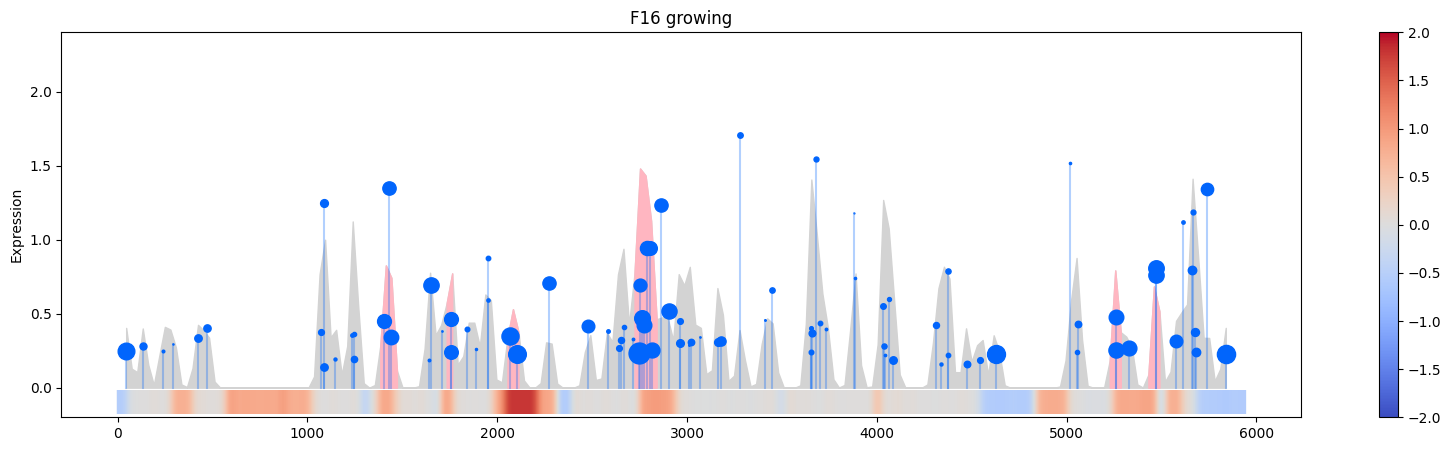

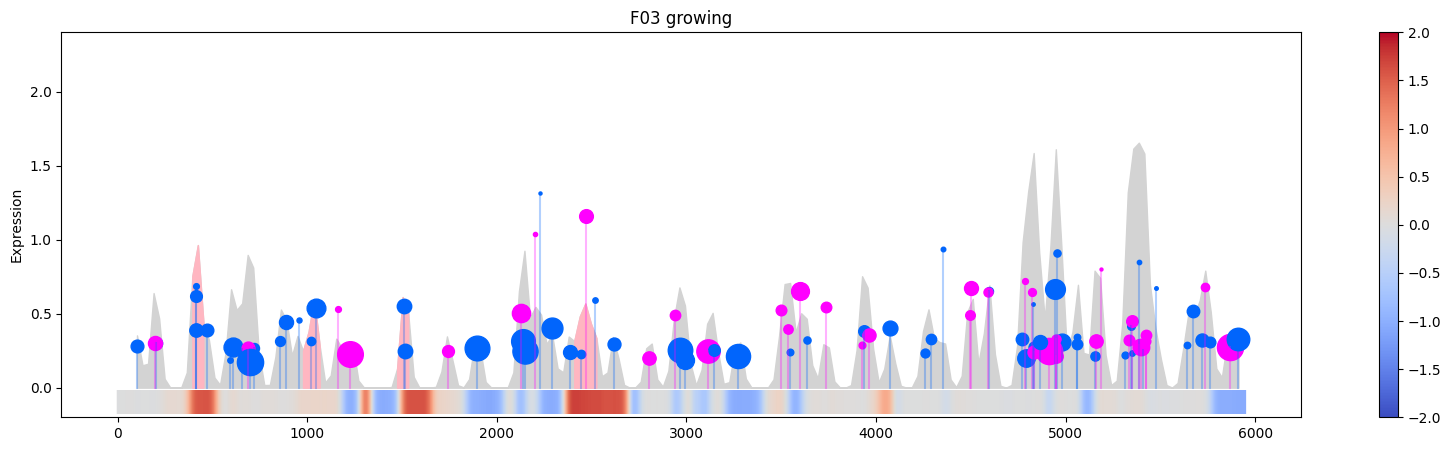

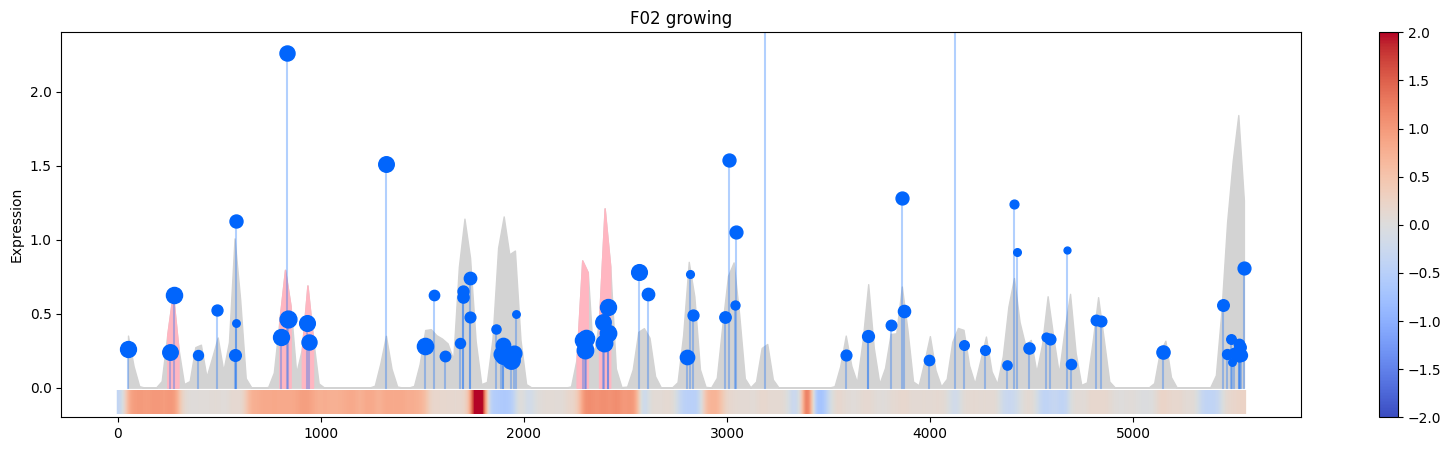

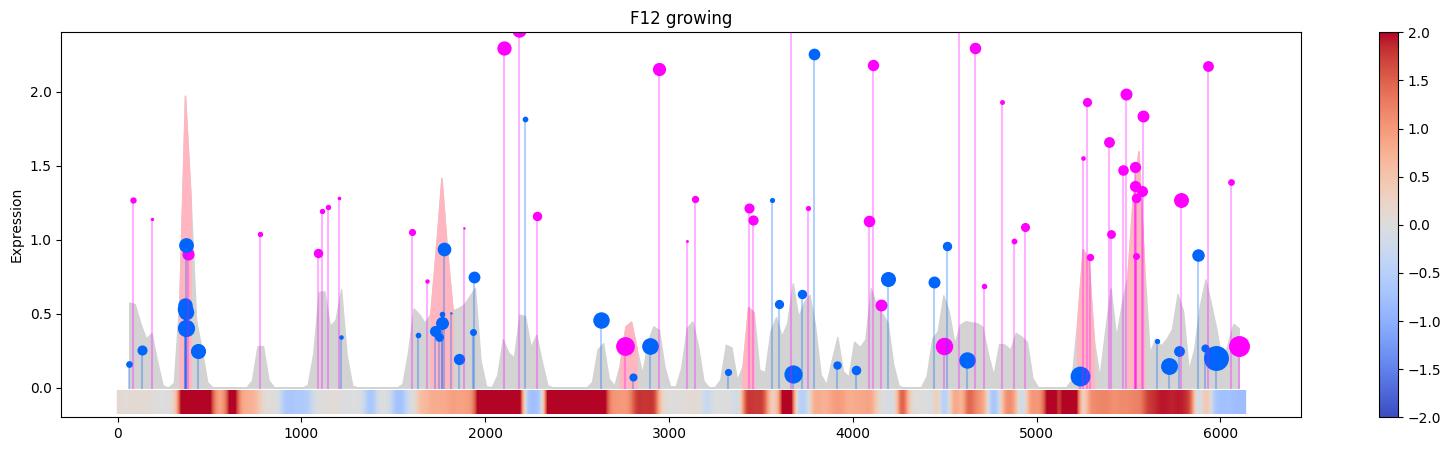

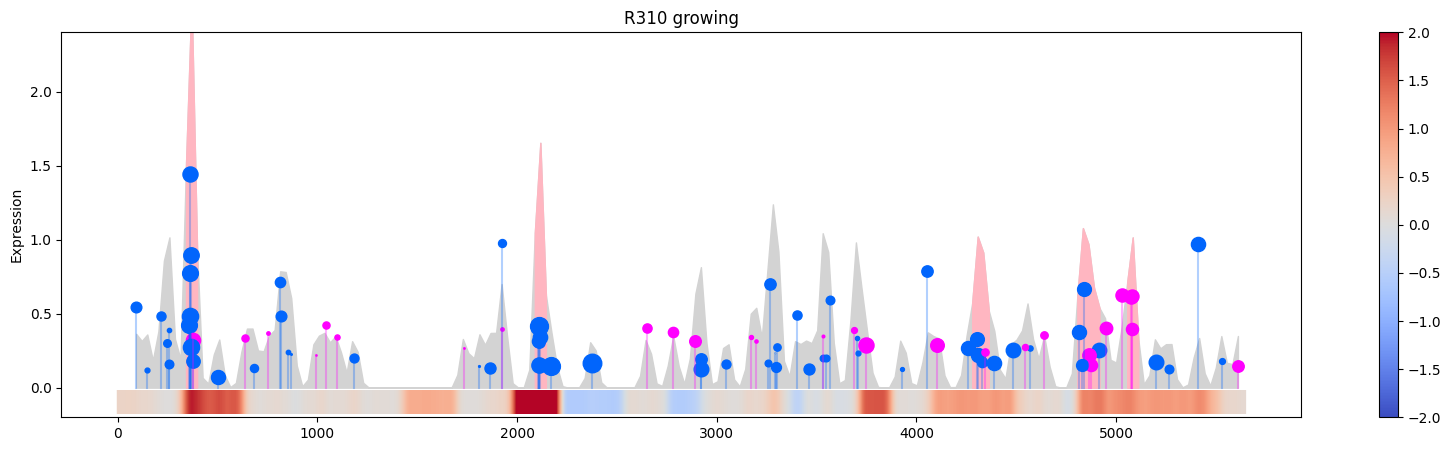

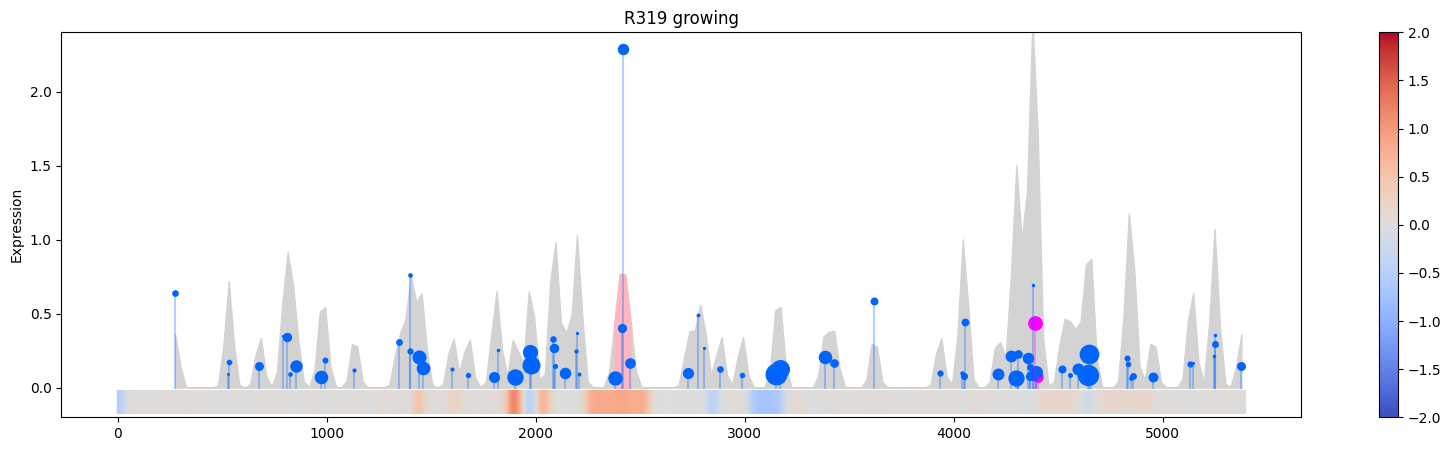

In [54]:
#hotspot genes in growing
all_hs_genes = {}
select_hs_genes = {}
smoothed_eta = {}
for pt in degs.keys():
    smooth_eta, alls, plotlist = run_patient(pt,"growing", mode=1, bw_adjust=.03)
    all_hs_genes[pt] = alls
    select_hs_genes[pt] = plotlist
    smoothed_eta[pt] = smooth_eta

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeErro

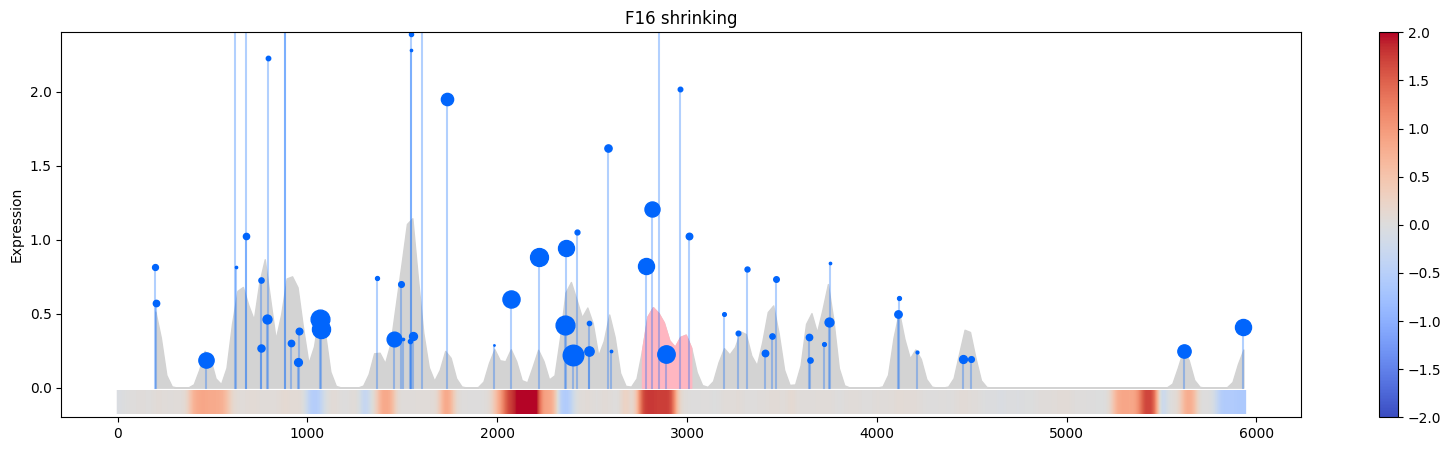

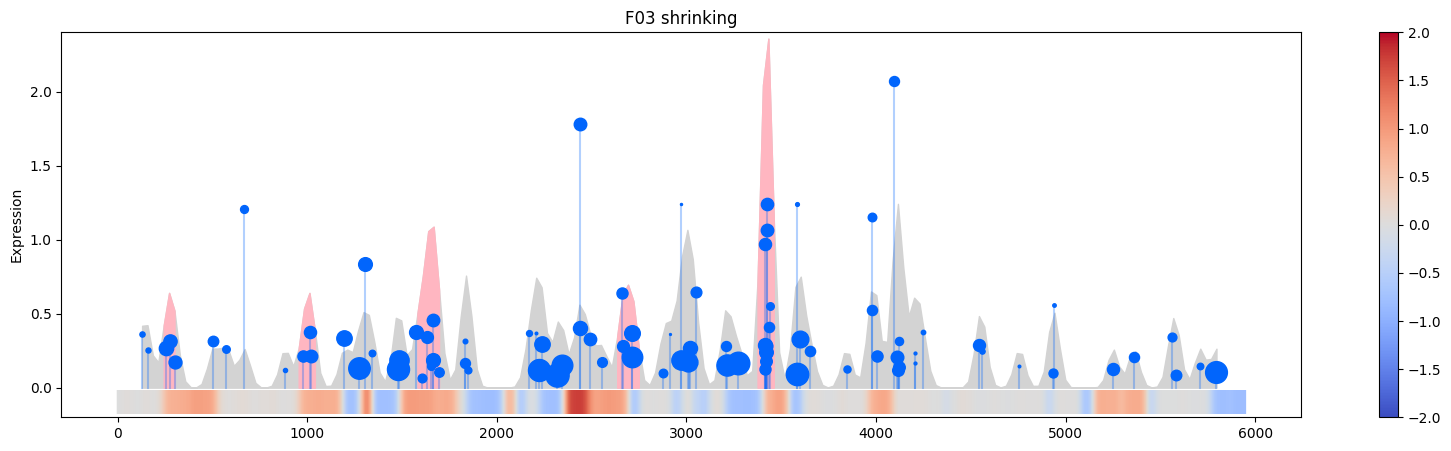

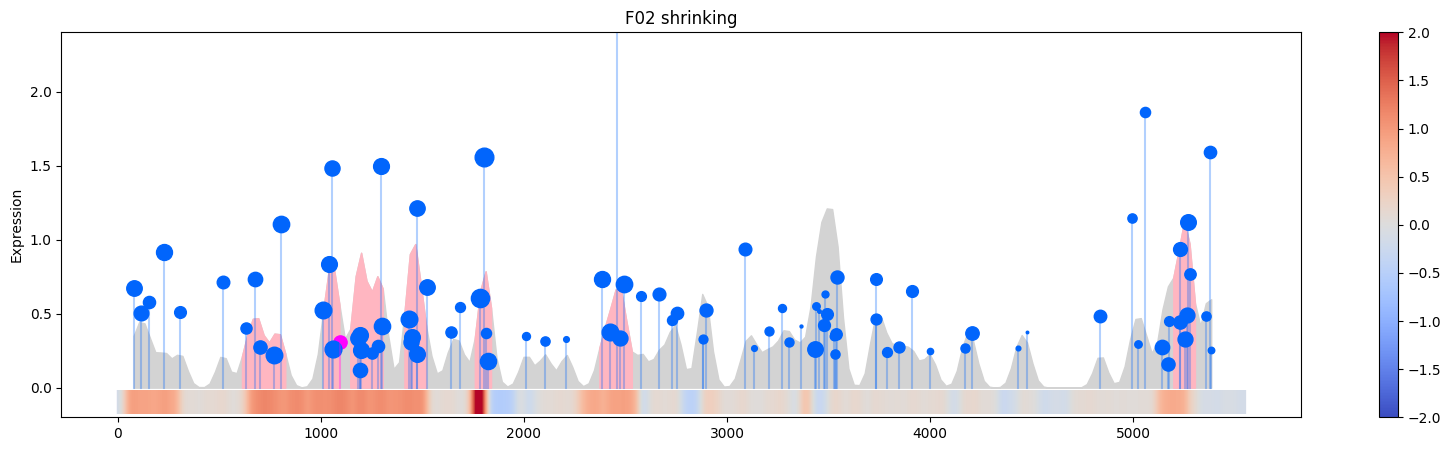

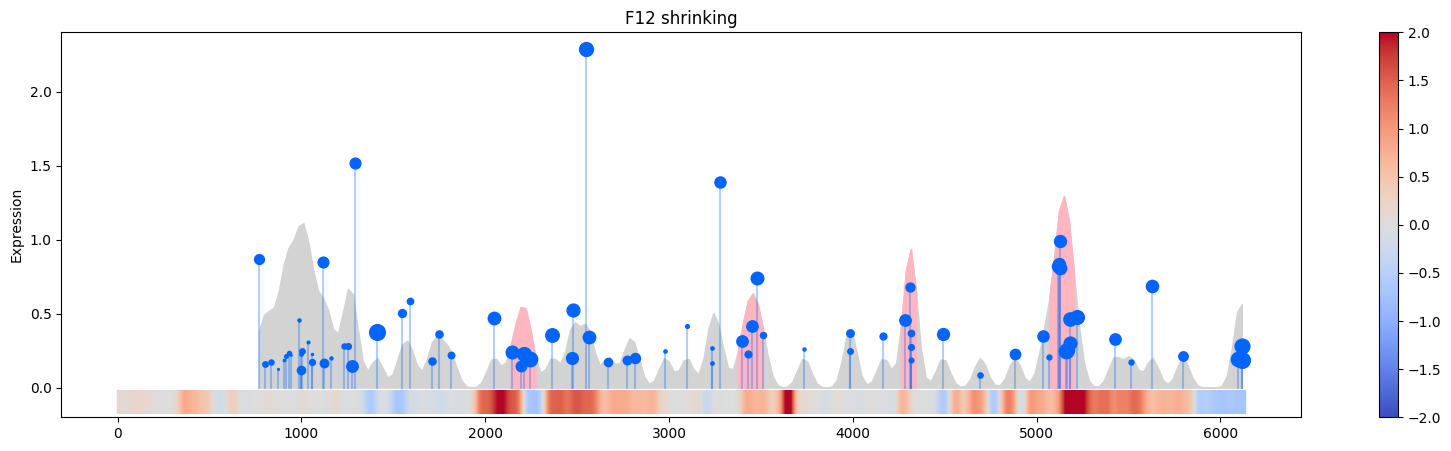

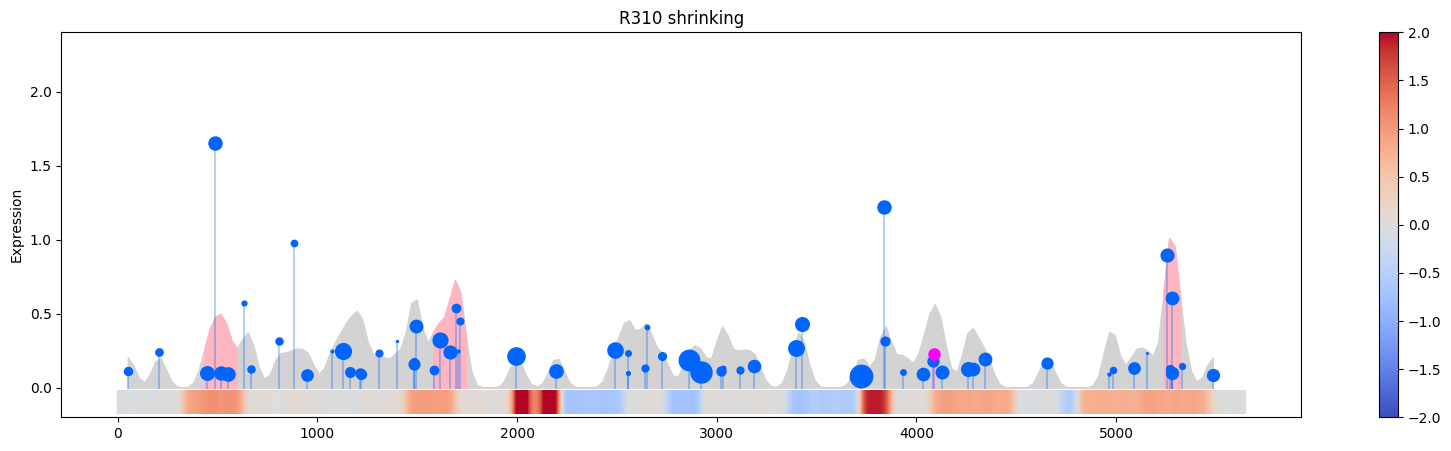

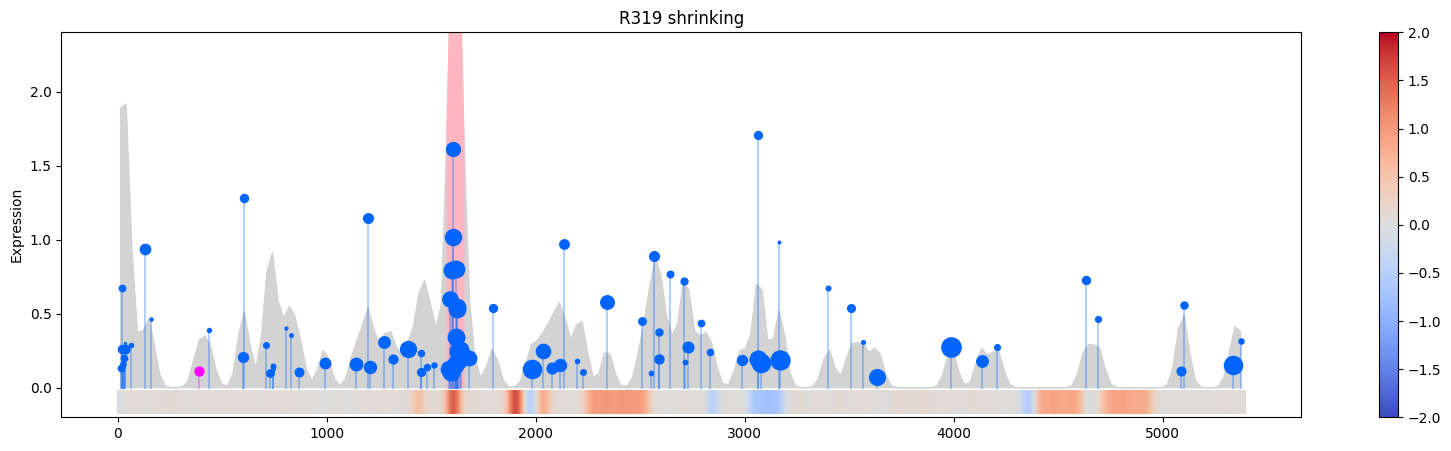

In [117]:
#hotspot genes in shrinking
all_sh_genes = {}
select_sh_genes = {}
smoothed_eta = {}
for pt in degs.keys():
    smooth_eta, alls, plotlist = run_patient(pt,"shrinking", mode=1, bw_adjust=.05)
    all_sh_genes[pt] = alls
    select_sh_genes[pt] = plotlist
    smoothed_eta[pt] = smooth_eta

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeErro

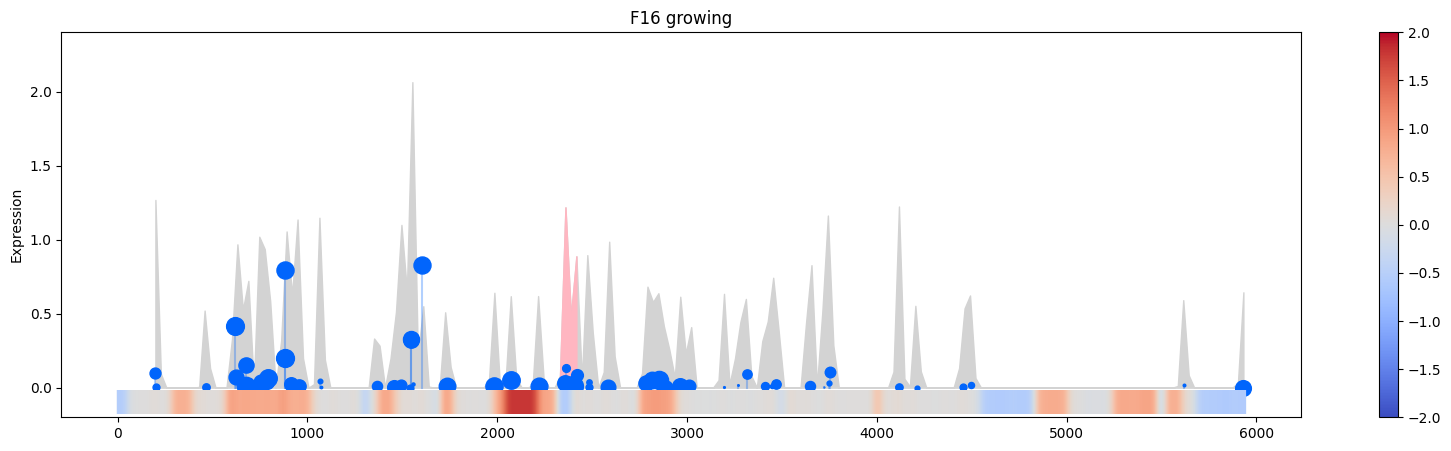

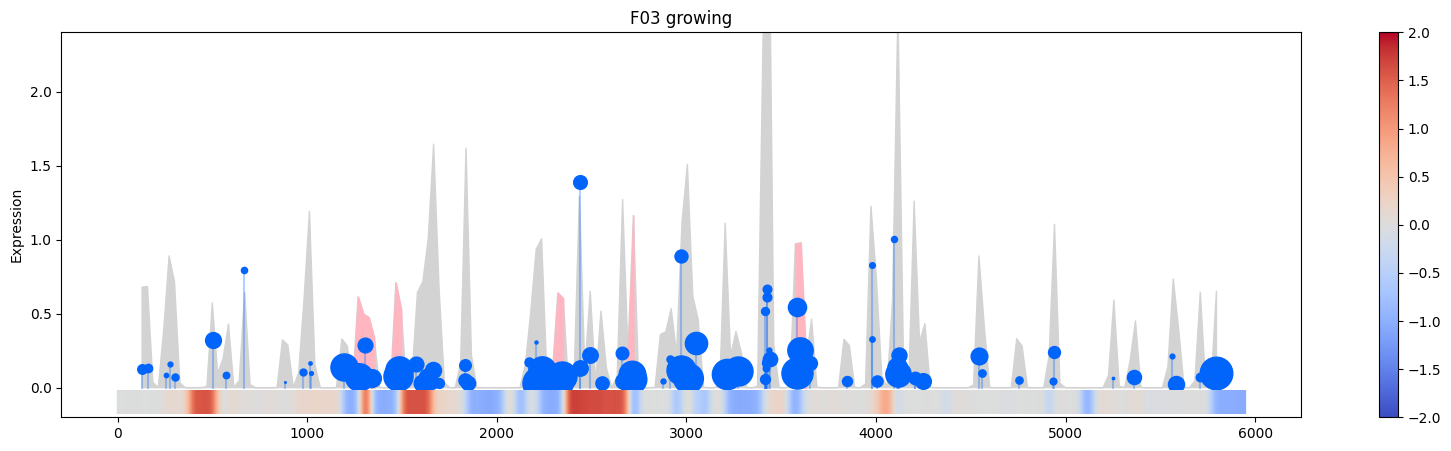

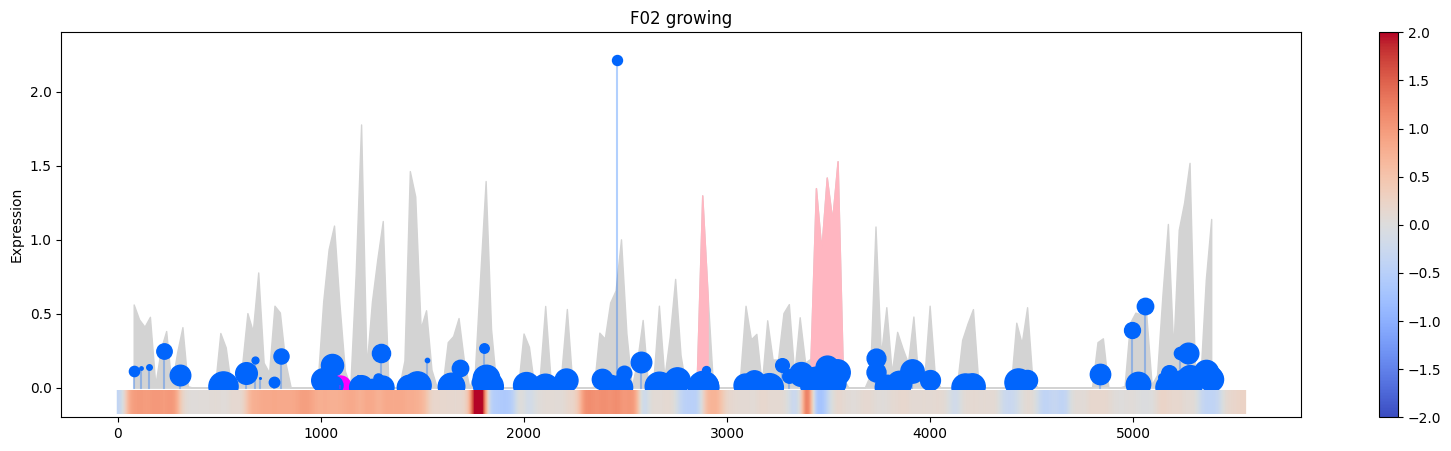

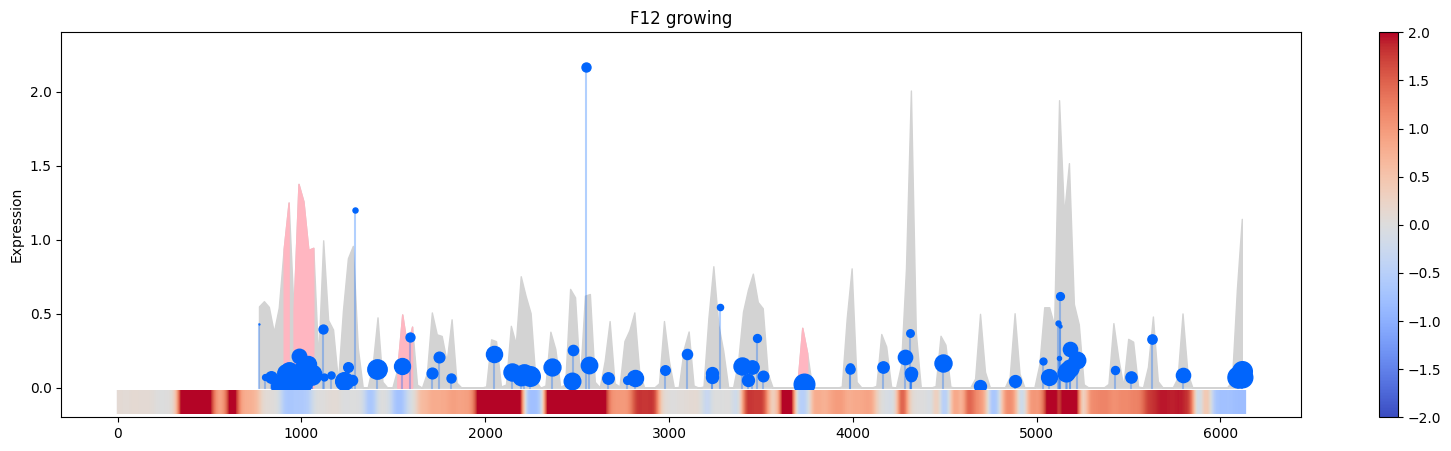

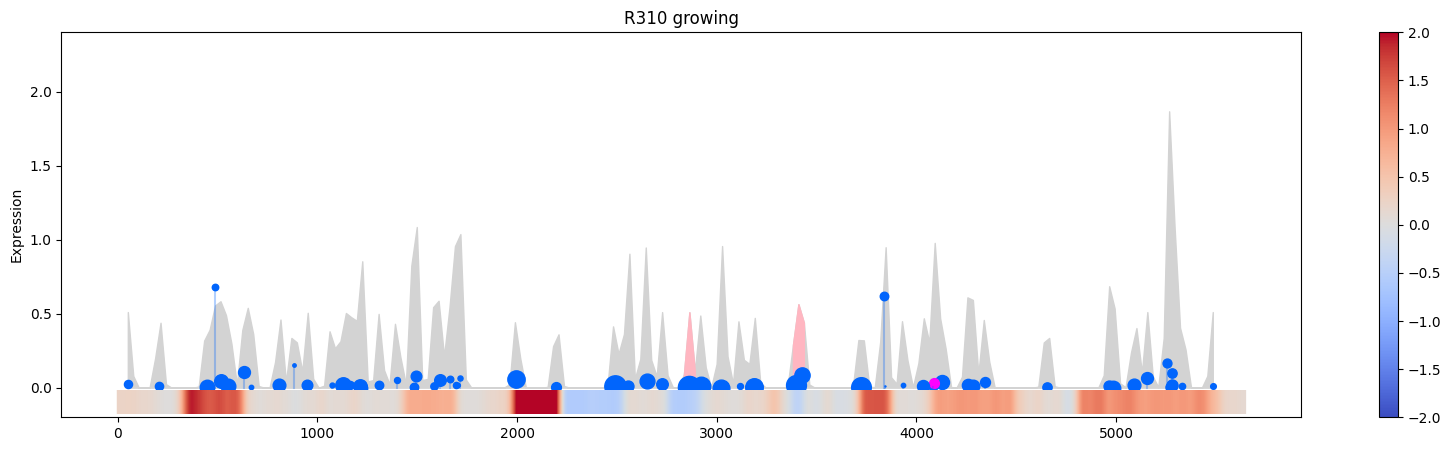

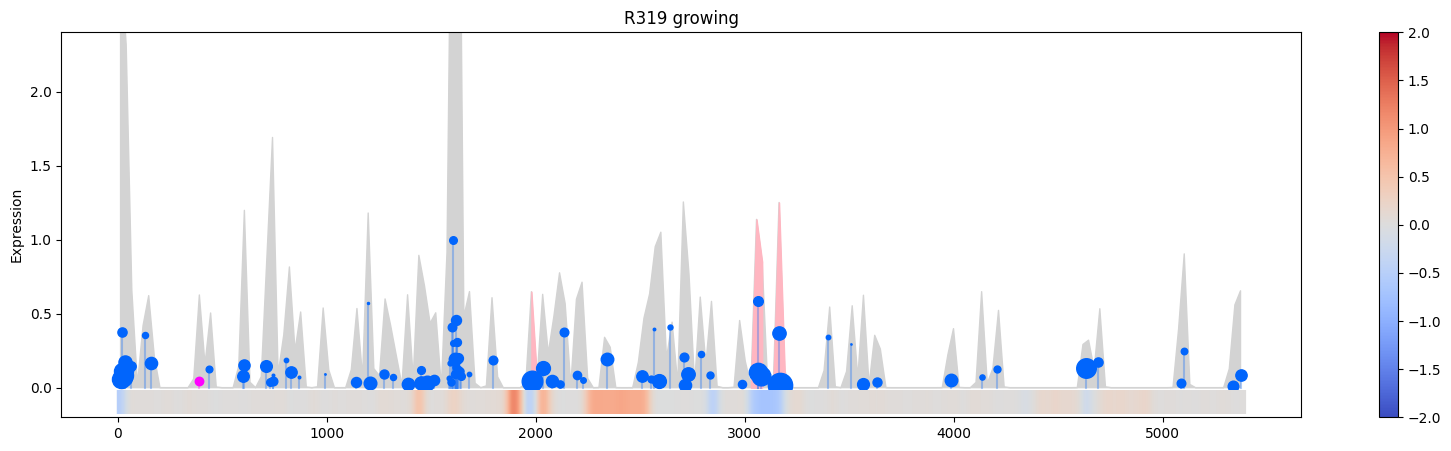

In [56]:
#coldspot genes in growing
all_cs_genes = {}
select_cs_genes = {}
for pt in degs.keys():
    smooth_eta, alls, plotlist = run_patient(pt,"growing",-1, bw_adjust=.02)
    all_cs_genes[pt] = alls
    select_cs_genes[pt] = plotlist

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeErro

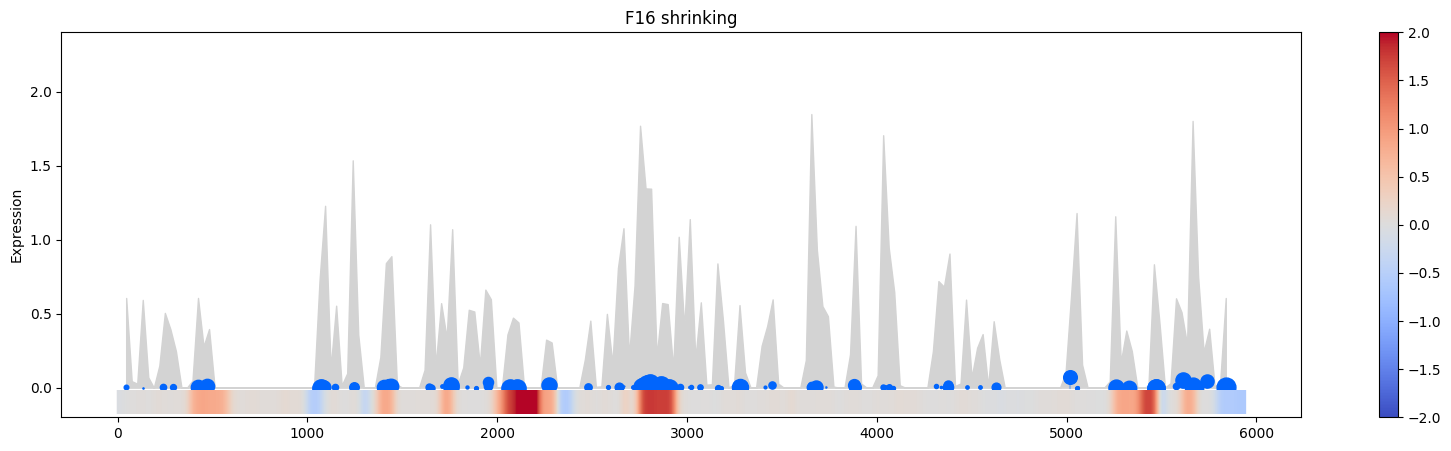

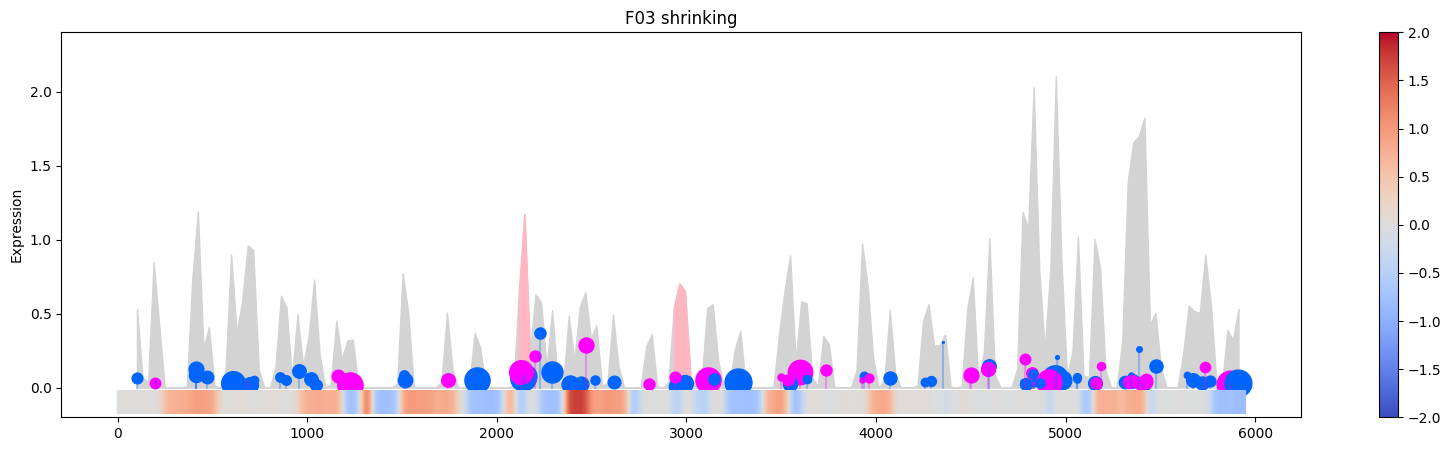

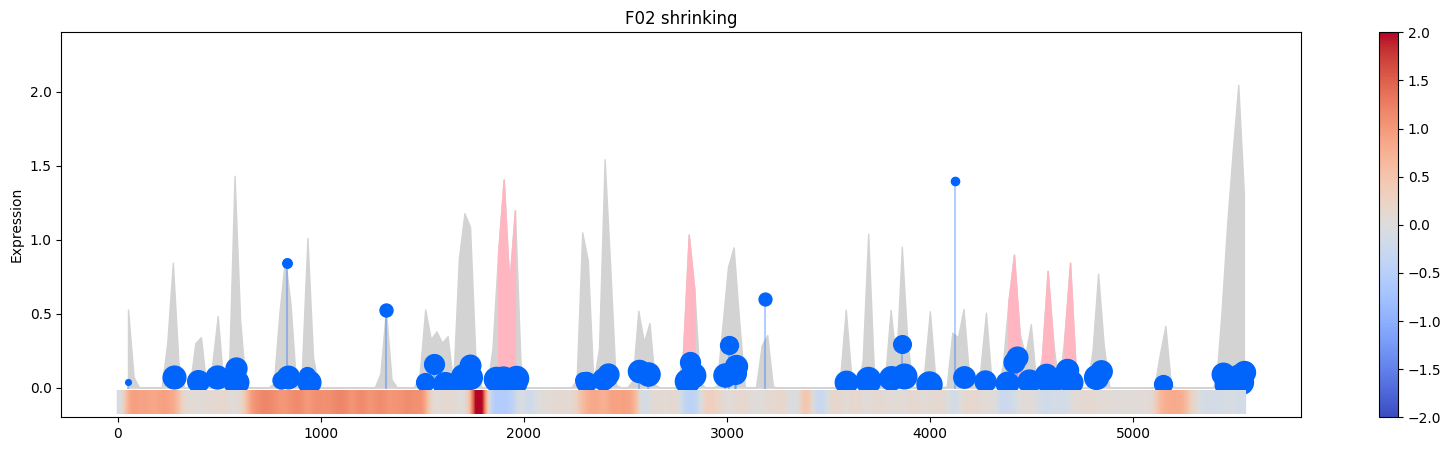

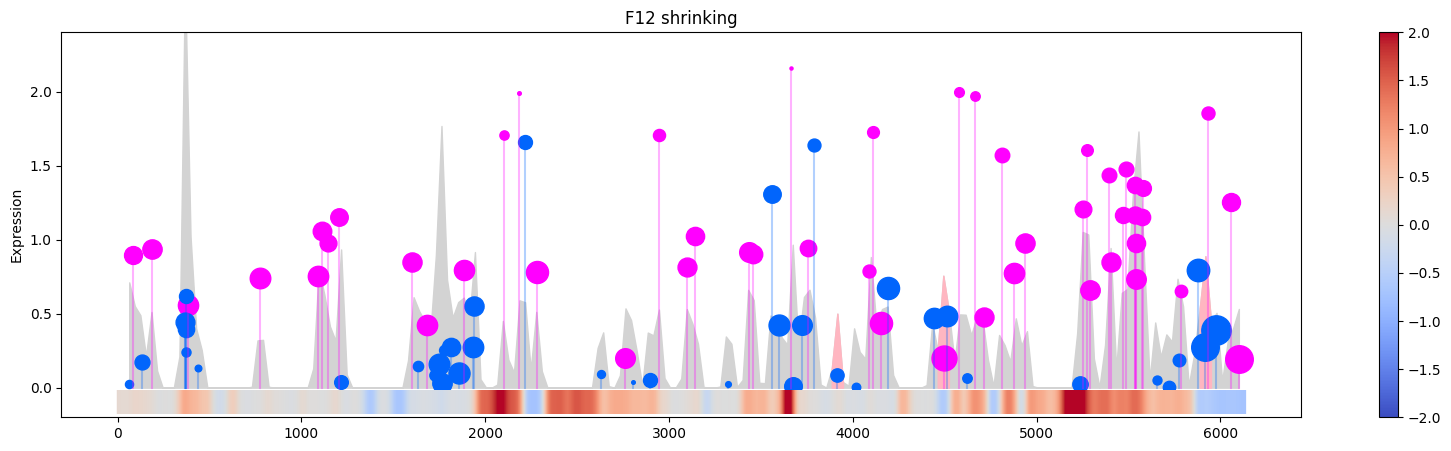

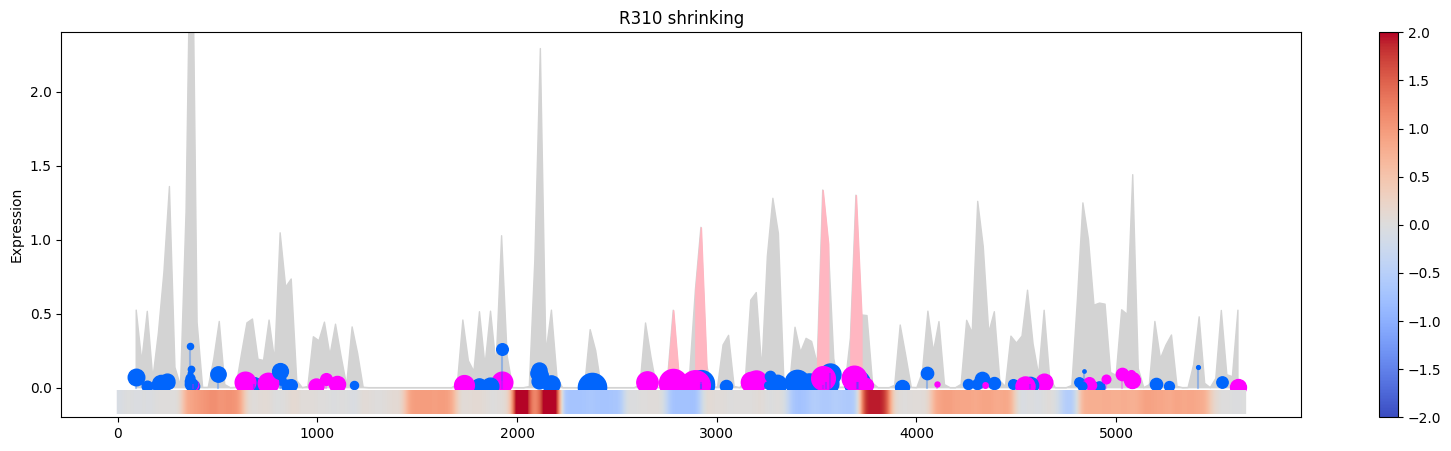

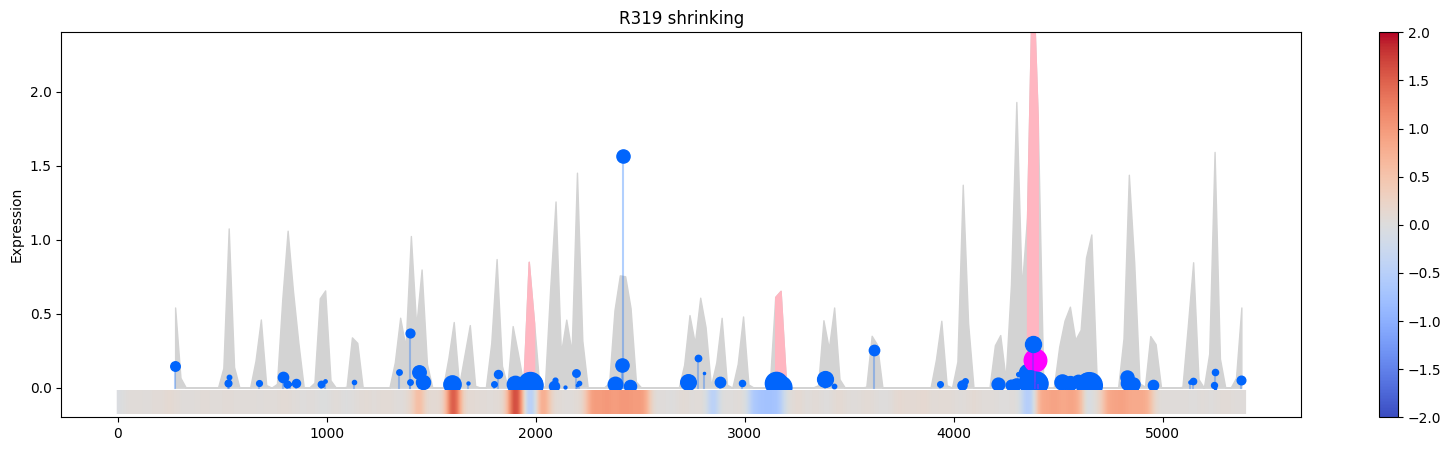

In [57]:
#coldspot genes in growing
all_cs_sh_genes = {}
select_cs_sh_genes = {}
for pt in degs.keys():
    smooth_eta, alls, plotlist = run_patient(pt,"shrinking",-1, bw_adjust=.02)
    all_cs_sh_genes[pt] = alls
    select_cs_sh_genes[pt] = plotlist

In [90]:
#combine hotspot and coldspot genes in growing
all_cs_genes_flat = []
for i in list(all_cs_genes.values()):
    all_cs_genes_flat+=i
count_cs_genes = pd.DataFrame(np.unique(all_cs_genes_flat, return_counts=True))
all_cs_genes_flat = np.unique(all_cs_genes_flat)

all_hs_genes_flat = []
for i in list(all_hs_genes.values()):
    all_hs_genes_flat+=i
count_hs_genes = pd.DataFrame(np.unique(all_hs_genes_flat, return_counts=True))
all_hs_genes_flat = np.unique(all_hs_genes_flat)

In [59]:
#get list of extrinsic genes for growing
all_ext_genes = {}
select_ext_genes = {}

all_ext_genes_down = {}
select_ext_genes_down = {}
condition = 'growing'
for patient in degs.keys():
    states = pd.read_csv(PATH+patient+"/"+patient+"_states_new.csv", index_col=0).T
    
    st = pd.read_csv(PATH+patient+"/"+patient+"_status.csv", index_col=0)
    st.index = [patient+"_"+str(i) for i in st.index]
    srt = st[st[patient]==condition].index
    
    states_mode = []
    for i in states.index:
        states_mode.append(scipy.stats.mode(list(states[srt].loc[i]))[0])
    
    growing_states = pd.DataFrame(states_mode, index=states.index)

    #upregulated extrinsic 
    deg_df = degs[patient]
    deg_df.index = deg_df["names"]
    deg_df = deg_df.loc[np.intersect1d(deg_df.index, growing_states.index)]
    deg_df = deg_df[deg_df["pvals_adj"]<.05]
    deg_df = deg_df[deg_df["logfoldchanges"]>0]

    neutrals = [i for i in deg_df.index if growing_states.loc[i][0]==0]
    neutrals = [i for i in neutrals if i not in all_hs_genes_flat]
    neutrals = [i for i in neutrals if i not in all_cs_genes_flat]
    all_ext_genes[patient] = neutrals
    select_ext_genes[patient] = list(deg_df.loc[neutrals].sort_values(by='logfoldchanges', ascending=False).iloc[0:10].index)

    #downregulated extrinsic
    deg_df = degs[patient]
    deg_df.index = deg_df["names"]
    deg_df = deg_df.loc[np.intersect1d(deg_df.index, growing_states.index)]
    deg_df = deg_df[deg_df["pvals_adj"]<.05]
    deg_df = deg_df[deg_df["logfoldchanges"]<0]

    neutrals = [i for i in deg_df.index if growing_states.loc[i][0]==0]
    neutrals = [i for i in neutrals if i not in all_hs_genes_flat]
    neutrals = [i for i in neutrals if i not in all_cs_genes_flat]
    all_ext_genes_down[patient] = neutrals
    select_ext_genes_down[patient] = list(deg_df.loc[neutrals].sort_values(by='logfoldchanges', ascending=True).iloc[0:10].index)

In [60]:
#combine extrinsic genes in growing
all_ext_genes_flat = []
for i in list(all_ext_genes.values()):
    all_ext_genes_flat+=i
count_ext_genes = pd.DataFrame(np.unique(all_ext_genes_flat, return_counts=True))
all_ext_genes_flat = np.unique(all_ext_genes_flat)

#combine extrinsic genes in growing
all_ext_genes_down_flat = []
for i in list(all_ext_genes.values()):
    all_ext_genes_down_flat+=i
count_ext_down_genes = pd.DataFrame(np.unique(all_ext_genes_down_flat, return_counts=True))
all_ext_genes_down_flat = np.unique(all_ext_genes_down_flat)

In [125]:
#combine hotspot and coldspot genes in shrinking
all_cs_genes_flat_sh = []
for i in list(all_cs_sh_genes.values()):
    all_cs_genes_flat_sh+=i
count_cs_genes_sh = pd.DataFrame(np.unique(all_cs_genes_flat_sh, return_counts=True))
all_cs_genes_flat_sh = np.unique(all_cs_genes_flat_sh)

all_hs_genes_flat_sh = []
for i in list(all_sh_genes.values()):
    all_hs_genes_flat_sh+=i
count_hs_genes_sh = pd.DataFrame(np.unique(all_hs_genes_flat_sh, return_counts=True))
all_hs_genes_flat_sh = np.unique(all_hs_genes_flat_sh)

In [126]:
count_hs_genes_sh = count_hs_genes_sh.T

In [128]:
count_hs_genes_sh.index = count_hs_genes_sh[0]
count_hs_genes_sh.loc[old]

0  1
0                  
NNT-AS1  NNT-AS1  3
LMBRD2    LMBRD2  3
TMEM267  TMEM267  3
RICTOR    RICTOR  3
ZFR          ZFR  3
FBXL7      FBXL7  3
MYO10      MYO10  3

In [63]:
#get list of extrinsic genes for shrinking
all_ext_genes_sh = {}
select_ext_genes_sh = {}

all_ext_genes_down_sh = {}
select_ext_genes_down_sh = {}

condition = 'shrinking'
for patient in degs.keys():
    states = pd.read_csv(PATH+patient+"/"+patient+"_states_new.csv", index_col=0).T
    
    st = pd.read_csv(PATH+patient+"/"+patient+"_status.csv", index_col=0)
    st.index = [patient+"_"+str(i) for i in st.index]
    srt = st[st[patient]==condition].index
    
    states_mode = []
    for i in states.index:
        states_mode.append(scipy.stats.mode(list(states[srt].loc[i]))[0])
    
    growing_states = pd.DataFrame(states_mode, index=states.index)

    deg_df = degs_shrinking[patient]
    deg_df.index = deg_df["names"]
    deg_df = deg_df.loc[np.intersect1d(deg_df.index, growing_states.index)]
    deg_df = deg_df[deg_df["pvals_adj"]<.05]
    deg_df = deg_df[deg_df["logfoldchanges"]>0]

    neutrals = [i for i in deg_df.index if growing_states.loc[i][0]==0]
    neutrals = [i for i in neutrals if i not in all_hs_genes_flat_sh]
    neutrals = [i for i in neutrals if i not in all_cs_genes_flat_sh]
    all_ext_genes_sh[patient] = neutrals
    select_ext_genes_sh[patient] = list(deg_df.loc[neutrals].sort_values(by='logfoldchanges', ascending=False).iloc[0:10].index)

    #downregulated
    deg_df = degs_shrinking[patient]
    deg_df.index = deg_df["names"]
    deg_df = deg_df.loc[np.intersect1d(deg_df.index, growing_states.index)]
    deg_df = deg_df[deg_df["pvals_adj"]<.05]
    deg_df = deg_df[deg_df["logfoldchanges"]<0]

    neutrals = [i for i in deg_df.index if growing_states.loc[i][0]==0]
    neutrals = [i for i in neutrals if i not in all_hs_genes_flat_sh]
    neutrals = [i for i in neutrals if i not in all_cs_genes_flat_sh]
    all_ext_genes_down_sh[patient] = neutrals
    select_ext_genes_down_sh[patient] = list(deg_df.loc[neutrals].sort_values(by='logfoldchanges', ascending=True).iloc[0:10].index)

In [64]:
#combine extrinsic genes in shrinking
all_ext_genes_flat_sh = []
for i in list(all_ext_genes_sh.values()):
    all_ext_genes_flat_sh+=i
count_ext_genes_sh = pd.DataFrame(np.unique(all_ext_genes_flat_sh, return_counts=True))
all_ext_genes_flat_sh = np.unique(all_ext_genes_flat_sh)

#combine extrinsic genes in shrinking
all_ext_genes_flat_down_sh = []
for i in list(all_ext_genes_down_sh.values()):
    all_ext_genes_flat_down_sh+=i
count_ext_genes_down_sh = pd.DataFrame(np.unique(all_ext_genes_flat_down_sh, return_counts=True))
all_ext_genes_flat_down_sh = np.unique(all_ext_genes_flat_down_sh)

In [499]:
all_degs = []
for i in degs.keys():
    tmp = degs[i]
    tmp = tmp[tmp["pvals_adj"]<.05]
    tmp = tmp[tmp["logfoldchanges"]>0]
    all_degs+=list(tmp.index)
count_degs_growing = pd.DataFrame(np.unique(all_degs, return_counts=True)).T

### Cheatsheet for all the variables:

-count_ext_genes_sh: dataframe of all extrinsic genes and how many patients shared by (shrinking)

-count_ext_genes: dataframe of all extrinsic genes and how many patients shared by (growing)

-count_hs_genes: dataframe of all hotspot genes and how many patients shared by (growing)

-count_hs_genes_sh: dataframe of all hotspot genes and how many patients shared by (shrinking)

-count_cs_genes: dataframe of all coldspot genes and how many patients shared by (growing)

-count_cs_genes_sh: dataframe of all coldspot genes and how many patients shared by (shrinking)

-all_ext_genes_flat_down_sh: all extrinsic downregulated genes across shrinking

-all_ext_genes_flat_down: all extrinsic downregulated genes across growing

-all_ext_genes_flat_sh: all extrinsic genes across shrinking

-all_ext_genes_flat: all extrinsic genes across growing

-all_hs_genes_flat_sh: all hotspot genes, 

-all_hs_genes_flat: all hotspot genes, growing

-all_cs_genes_flat_sh: all coldspot genes, shrinking

-all_cs_genes_flat: all coldspot genes, growing


"select" prefix means top 10 ranked by log fold change (positive for up and negative for downregulated)

In [99]:
ins = smoothed_eta["F16"].index
for key in smoothed_eta.keys():
    ins = np.intersect1d(ins, smoothed_eta[key].index)
ins = [i for i in smoothed_eta["F16"].index if i in ins] #reorder back to genome (any patient index will do since we intersect)

In [100]:
gr_et_df = pd.DataFrame()
for key in smoothed_eta.keys():
    gr_et_df[key] = smoothed_eta[key].loc[ins]

In [491]:
ins = []
for key in smoothed_eta.keys():
    ins += list(select_hs_genes[key])
ins = np.unique(ins)

ins_shrink = []
for key in smoothed_eta.keys():
    ins_shrink += list(select_hs_genes_sh[key])
ins_shrink = np.unique(ins_shrink)

In [494]:
combine = list(ins)+list(ins_shrink)
combine = np.intersect1d(combine, exp.index)

In [495]:
filter_mean = pd.DataFrame(exp.loc[combine].dropna().var(axis=1))

In [510]:
highly_expressed_hs_genes = filter_mean[filter_mean[0]>.13].index

In [513]:
exp = exp.dropna()

In [65]:
def flat_dict(dic):
    all_ext_genes_flat_sh = []
    for i in list(dic.values()):
        all_ext_genes_flat_sh+=i
    return np.unique(all_ext_genes_flat_sh)

In [426]:
def quadrant_order(exp, hs_genes_gr, hs_genes_sh): 
    gr_srt = list(status[status[0]=="growing"].index)
    sh_srt = list(status[status[0]=="shrinking"].index)
    srt = gr_srt + sh_srt
    
    #get the order of growing genes clustered in growing clusters
    plot = hs_genes_gr
    plot = np.intersect1d(plot, exp.index)
    cm = sns.clustermap(exp.loc[plot].T.loc[gr_srt], figsize=(3,3), metric='euclidean')
    gr_genes_reorder = plot[cm.dendrogram_col.reordered_ind]
    plt.clf()    
    #get the order of growing clusters in all hs genes
    plot = hs_genes_gr
    plot = np.intersect1d(plot, exp.index)
    cm = sns.clustermap(exp.loc[plot].T.loc[gr_srt], figsize=(3,3), metric='euclidean')
    #gr_clust_reorder = np.asarray(gr_srt)[cm.dendrogram_row.reordered_ind]
    gr_clust_reorder = gr_srt
    plt.clf()    
    #get the order of shrinking genes clustered in shrinking clusters
    plot = hs_genes_sh
    plot = np.intersect1d(plot, exp.index)
    cm = sns.clustermap(exp.loc[plot].T.loc[sh_srt], figsize=(3,3), metric='euclidean')
    sh_genes_reorder = plot[cm.dendrogram_col.reordered_ind]
    plt.clf()
    
    #get the order of shrinking clusters in all hs genes
    plot = hs_genes_sh
    plot = np.intersect1d(plot, exp.index)
    cm = sns.clustermap(exp.loc[plot].T.loc[sh_srt], figsize=(3,3), metric='euclidean')
    #sh_clust_reorder = np.asarray(sh_srt)[cm.dendrogram_row.reordered_ind]
    sh_clust_reorder = sh_srt #if we want to group clusters by patient instead of by dendrogram
    plt.clf()

    genes_order = list(gr_genes_reorder) + list(sh_genes_reorder)
    #remove the few genes that are in both growing and shrinking hotspots
    genes_order = [i for i in genes_order if i not in np.intersect1d(hs_genes_gr, hs_genes_sh)]
    clust_order = list(gr_clust_reorder) + list(sh_clust_reorder)

    #print(len(np.intersect1d(hs_genes_gr, hs_genes_sh)))
    #print(len([i for i in gr_genes_reorder if i in genes_order]))
    #print(len([i for i in sh_genes_reorder if i in genes_order]))


    return genes_order, clust_order, len(gr_clust_reorder), len([i for i in gr_genes_reorder if i in genes_order])

### top 10 per patient by LFC

In [67]:
clin = pd.read_csv('clin.csv')
clin.index = clin["sample"]
clin = clin.drop_duplicates()

import os
PATH = "hmm_all_pt/"
cl_treat = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        obs = X.obs
        for cl in np.unique(obs["leiden"]):
            sampl = pd.DataFrame(np.unique(obs[obs['leiden']==cl]["sample"], return_counts=True)).T.sort_values(by=1, ascending=False).iloc[0][0]
            cl_treat[patient+"_"+str(cl)] = [clin.loc[sampl]["treated"]]
cl_treat = cl_treat.T

PATH = "hmm_all_pt/"
cl_r = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        obs = X.obs
        for cl in np.unique(obs["leiden"]):
            sampl = pd.DataFrame(np.unique(obs[obs['leiden']==cl]["sample"], return_counts=True)).T.sort_values(by=1, ascending=False).iloc[0][0]
            cl_r[patient+"_"+str(cl)] = [clin.loc[sampl]["responder"]]
cl_r = cl_r.T

PATH = "hmm_all_pt/"
cl_c = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        obs = X.obs
        for cl in np.unique(obs["leiden"]):
            sampl = pd.DataFrame(np.unique(obs[obs['leiden']==cl]["sample"], return_counts=True)).T.sort_values(by=1, ascending=False).iloc[0][0]
            cl_c[patient+"_"+str(cl)] = [clin.loc[sampl]["combination"]]
cl_c = cl_c.T

cl_c = cl_c.fillna("nan")

In [141]:
def make_heatmap(genes_order, clust_order, len_clust, a, ticks_on=False):
    fig = plt.figure(figsize=(13,12))
    ax1 = plt.subplot2grid((23,22), (0,1), colspan=19, rowspan=19)
    ax2 = plt.subplot2grid((23,22), (0,20), colspan=1, rowspan=19,sharey = ax1)
    ax3 = plt.subplot2grid((23,22), (0,0), colspan=1, rowspan=19,sharey = ax1)
    
    dat = exp_norm.loc[genes_order][clust_order].T
    sns.heatmap(scipy.stats.zscore(dat, axis=0), cmap='PiYG_r', vmin=-2, vmax=2, ax=ax1, cbar=False, xticklabels=ticks_on)
    
    stat_bar = list(status.loc[dat.index][0]) #labels for status
    treat_bar = list(cl_treat.loc[dat.index][0]) #labels for treatment
    res_bar = list(cl_r.loc[dat.index][0]) #labels for response
    com_bar = list(cl_c.loc[dat.index][0]) #labels for combo
    pat_bar = [i.split("_")[0] for i in dat.index] #labels for patients
    
    pal = {"growing":"red","shrinking":"green","stable":"grey"}
    ax3.scatter([1 for i in range(dat.shape[0])],np.arange(dat.shape[0])+.5, c=[pal[i] for i in stat_bar], marker='s', s=60)
    
    pal = {
     'F01': '#FF5733',
     'F02': '#33FF57',
     'F03': '#5733FF',
     'F12': '#F0FF33',
     'F16': '#33F0FF',
     'R310': '#FF33F0',
     'R319': '#C70039'
    }
    ax3.scatter([2 for i in range(dat.shape[0])],np.arange(dat.shape[0])+.5, c=[pal[i] for i in pat_bar], marker='s', s=60)
   
    ax3.set_xlim([0,3])
    ax3.set_yticks([])
    ax3.set_xticks([1,2],["status","patient"], rotation=90)
    
    pal = {"Treated":"pink","Untreated":"teal"}
    ax2.scatter([1 for i in range(dat.shape[0])],np.arange(dat.shape[0])+.5, c=[pal[i] for i in treat_bar], marker='s', s=60)
    
    pal = {"Non-responder":"violet","Responder":"lime"}
    ax2.scatter([2.5 for i in range(dat.shape[0])],np.arange(dat.shape[0])+.5, c=[pal[i] for i in res_bar], marker='s', s=60)
    
    pal = {"nan":"grey","treated_combination":"coral", "treated_individual":"dodgerblue"}
    ax2.scatter([4 for i in range(dat.shape[0])],np.arange(dat.shape[0])+.5, c=[pal[i] for i in com_bar], marker='s', s=60)
    
    
    ax2.set_xlim([0,5])
    ax2.set_yticks([])
    ax2.set_xticks([1,2.5,4],["treated","responder","combo/mono"], rotation=90)
    
    ax1.axhline(len_clust, color='black')
    ax1.axvline(a, color='black')

In [40]:
adata_nr = sc.read_h5ad("adata_nr_latest.h5")

In [76]:
obs = adata_nr.obs
obs["pt_cluster"] = np.asarray(obs["patient"])+np.asarray(["_" for i in range(adata_nr.shape[0])])+np.asarray([str(i) for i in obs["leiden"]])

exp_norm = pd.DataFrame()
df = adata_nr.to_df()
for cl in np.unique(obs["pt_cluster"]):
    exp_norm = pd.concat((exp_norm, pd.DataFrame(df.loc[obs[obs["pt_cluster"]==cl].index].mean(axis=0),columns=[cl])),axis=1)

In [231]:
ligs = pd.read_csv("ContactTracing_interactions.txt", sep='\t')

In [233]:
count_hs_genes_sh.index = count_hs_genes_sh[0]
count_hs_genes_sh.loc[np.intersect1d(ligs["ligand"], count_hs_genes_sh.index)]

0  1
0                
CCL28    CCL28  2
DAG1      DAG1  1
IL1RAP  IL1RAP  1
VEGFA    VEGFA  1

In [132]:
count_hs_genes = count_hs_genes.T
#count_hs_genes_sh = count_hs_genes_sh.T

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

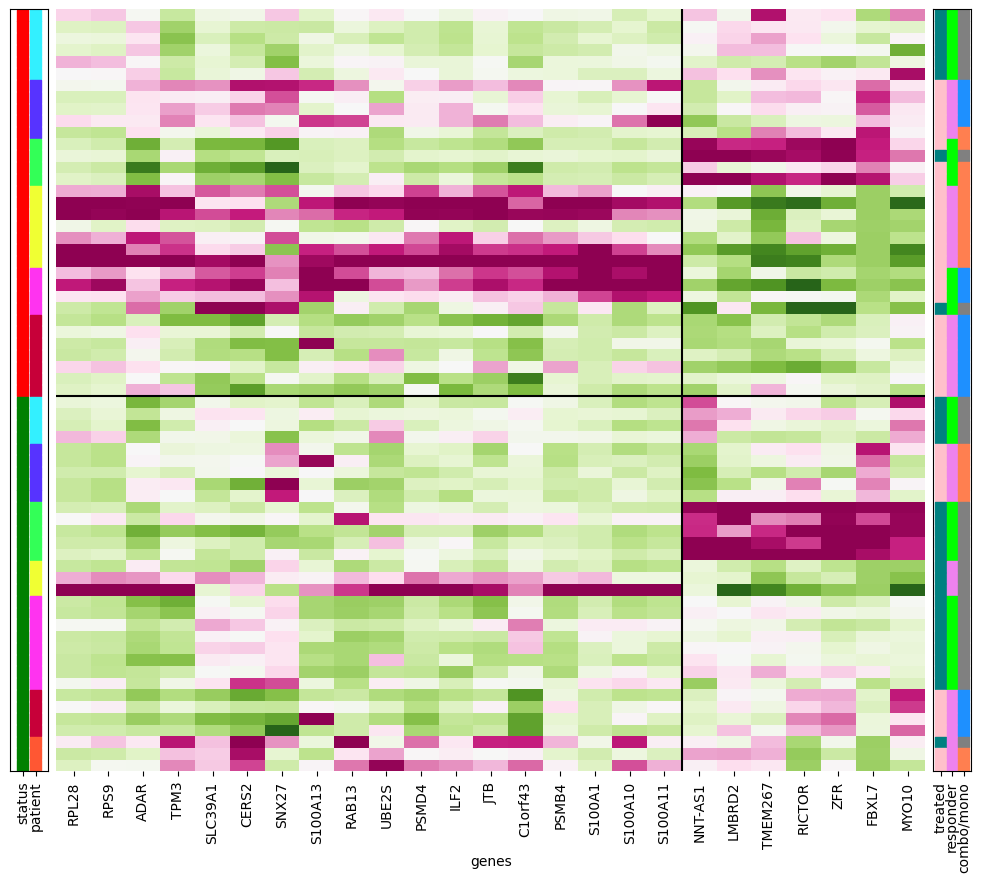

In [431]:
a = count_hs_genes[count_hs_genes[1]>=3][0] #list(count_hs_genes.T.sort_values(by=1, ascending=False).iloc[0:40][0])
b = count_hs_genes_sh[count_hs_genes_sh[1]>=3][0]#list(count_hs_genes_sh.T.sort_values(by=1, ascending=False).iloc[0:40][0])

genes_order, clust_order, len_clust, len_gen = quadrant_order(exp_norm, a, b)
make_heatmap(genes_order, clust_order, len_clust, len_gen, ticks_on=True)
plt.savefig("mel_figures/figure_2/2e.pdf")

0


<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

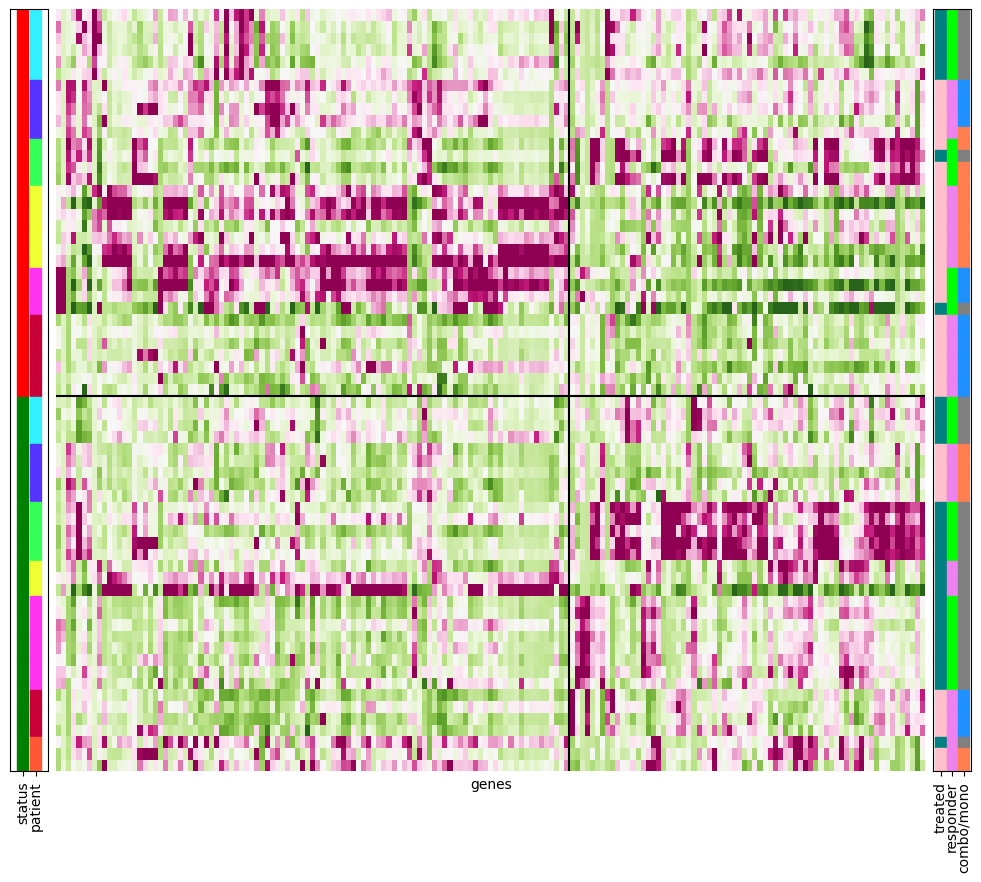

In [433]:
a = count_hs_genes[count_hs_genes[1]>=2][0] #list(count_hs_genes.T.sort_values(by=1, ascending=False).iloc[0:40][0])
b = count_hs_genes_sh[count_hs_genes_sh[1]>=2][0]#list(count_hs_genes_sh.T.sort_values(by=1, ascending=False).iloc[0:40][0])
print(len(np.intersect1d(a,b)))

genes_order, clust_order, len_clust, len_gen = quadrant_order(exp_norm, a, b)
make_heatmap(genes_order, clust_order, len_clust, len_gen, ticks_on=False)
plt.savefig("mel_figures/figure_2/S2a.pdf")

In [271]:
plt.rcParams.update({'font.size': 18}) 

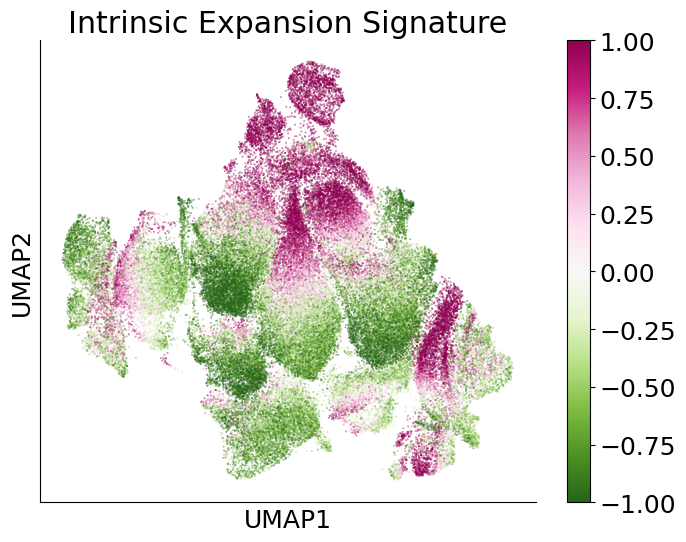

In [277]:
adata_nr.obs["hs_growing"] = adata_nr.to_df()[np.intersect1d(a, adata_nr.var_names)].mean(axis=1)
adata_nr.obs["hs_shrinking"] = adata_nr.to_df()[np.intersect1d(b, adata_nr.var_names)].mean(axis=1)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(adata_nr.obsm["X_umap"][:,0],adata_nr.obsm["X_umap"][:,1], c=scipy.stats.zscore(adata_nr.obs["hs_growing"]), s=.05, 
            cmap='PiYG_r', vmax=1, vmin=-1, rasterized=True)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("Intrinsic Expansion Signature")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save as PDF (vectorized except for points)
plt.savefig("mel_figures/2g_exp.pdf", dpi=300, bbox_inches='tight')

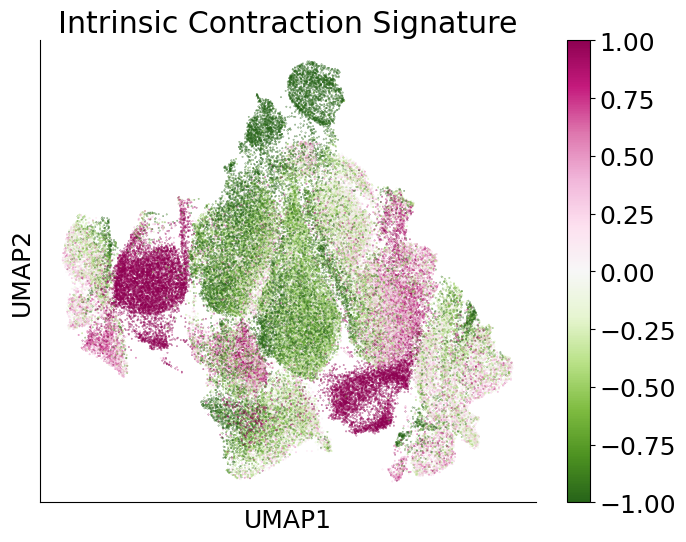

In [285]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(adata_nr.obsm["X_umap"][:,0],adata_nr.obsm["X_umap"][:,1], c=scipy.stats.zscore(adata_nr.obs["hs_shrinking"]), s=.05, 
            cmap='PiYG_r', vmax=1, vmin=-1, rasterized=True)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("Intrinsic Contraction Signature")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save as PDF (vectorized except for points)
plt.savefig("mel_figures/2g_sh.pdf", dpi=300, bbox_inches='tight')

/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_31952/2640451663.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(adata_nr.obsm["X_umap"][:,0],adata_nr.obsm["X_umap"][:,1], c=[pal[i] for i in adata_nr.obs["echidna_status"]], s=.05,


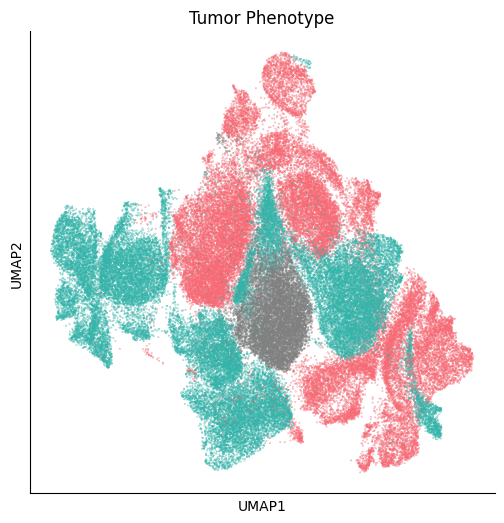

In [42]:
pal = {"growing":"#f66b76","shrinking":"#35b4aa","stable":"grey"}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(adata_nr.obsm["X_umap"][:,0],adata_nr.obsm["X_umap"][:,1], c=[pal[i] for i in adata_nr.obs["echidna_status"]], s=.05, 
            cmap='PiYG_r', vmax=1, vmin=-1, rasterized=True)
plt.xticks([])
plt.yticks([])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("Tumor Phenotype")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("mel_figures/2b_pheno.pdf", dpi=300, bbox_inches='tight')

## KINOMO

In [10]:
kinomo = pd.read_csv("table_finalgenes_best_top100_ward.D2_7MPs.csv")

In [11]:
for mp in kinomo.columns:
    adata_nr.obs[mp] = adata_nr.to_df()[np.intersect1d(kinomo[mp].dropna(), adata_nr.var_names)].mean(axis=1)

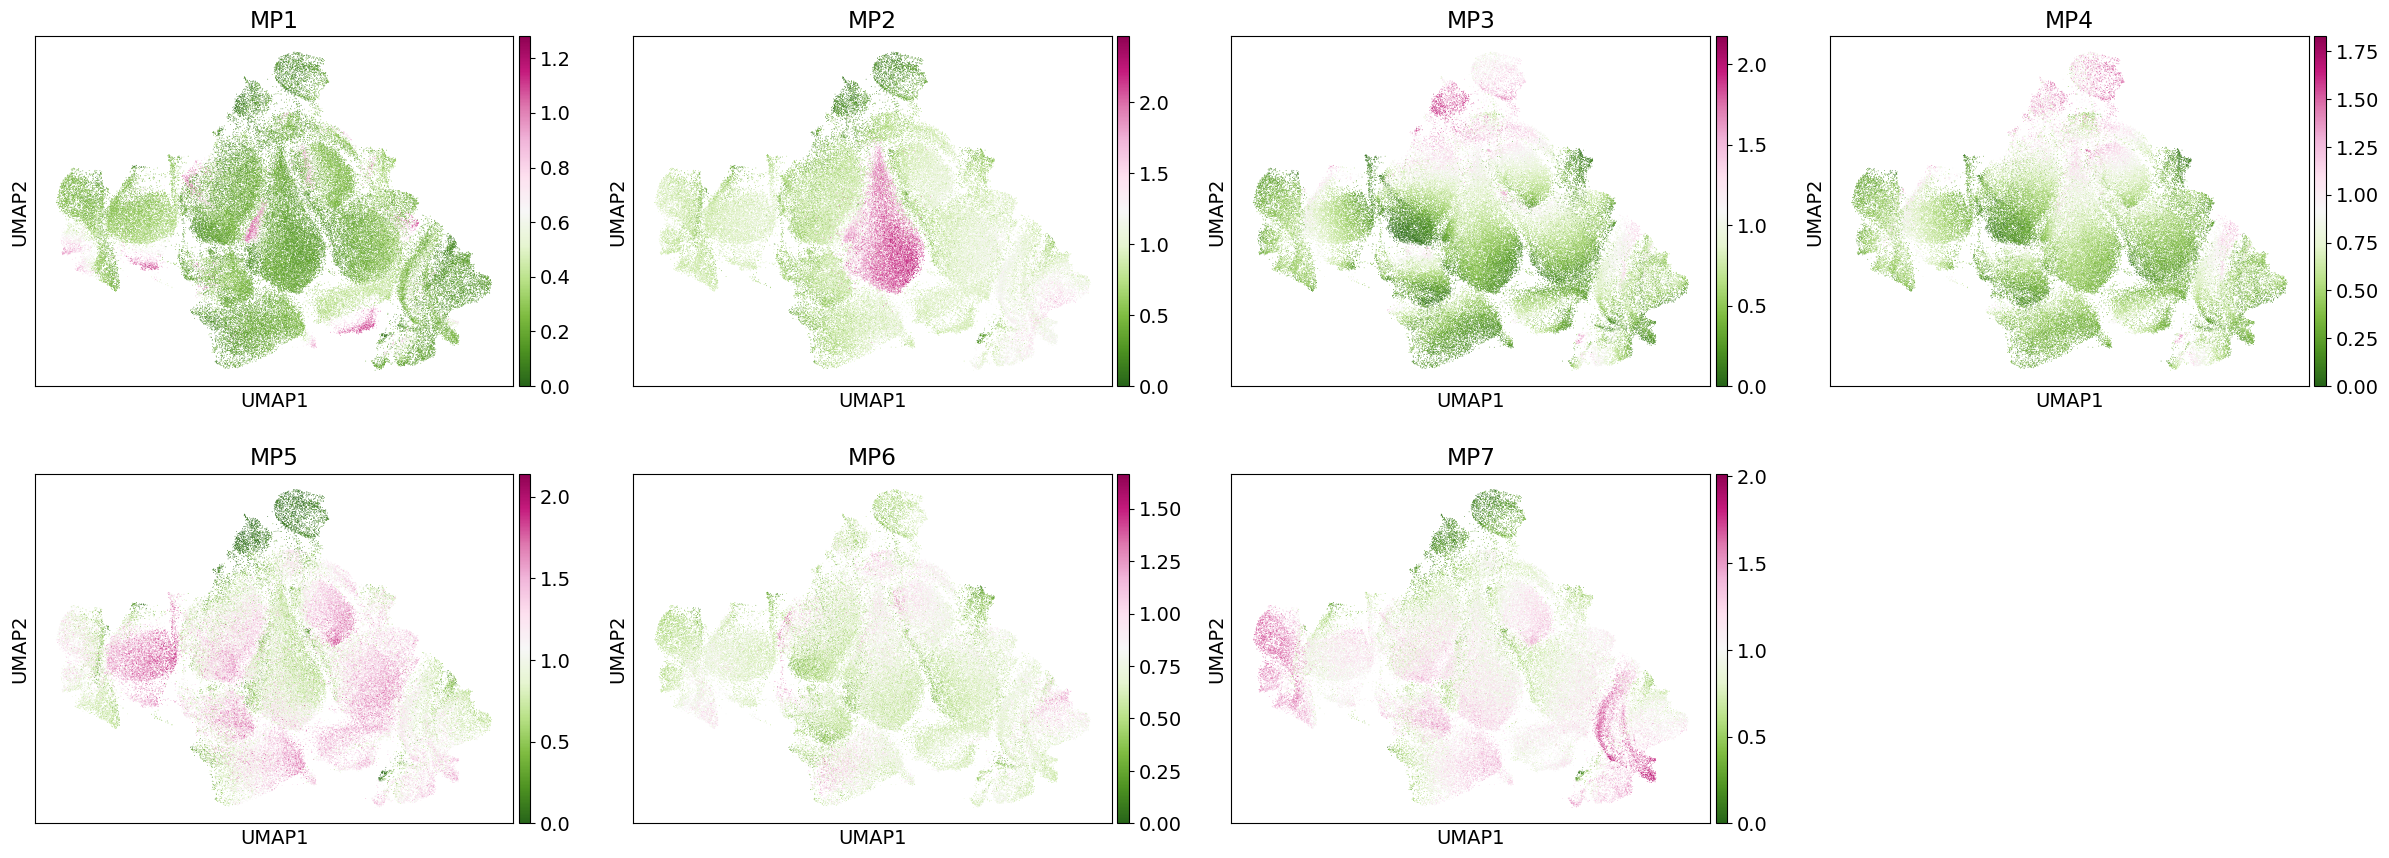

<Figure size 640x480 with 0 Axes>

In [409]:
sc.pl.umap(adata_nr, color=["MP"+str(i+1) for i in range(7)],cmap='PiYG_r')
# Get current figure
fig = plt.gcf()

# Rasterize all axes contents
for ax in fig.axes:
    for coll in ax.collections:
        coll.set_rasterized(True)

# Now save manually if needed
fig.savefig('mel_figures/figure_2/S2d_kinomo_rasterized.pdf', dpi=300)

In [413]:
plt.rcParams.update({'font.size': 10,'axes.titlesize': 10, 'axes.labelsize': 10 }) 


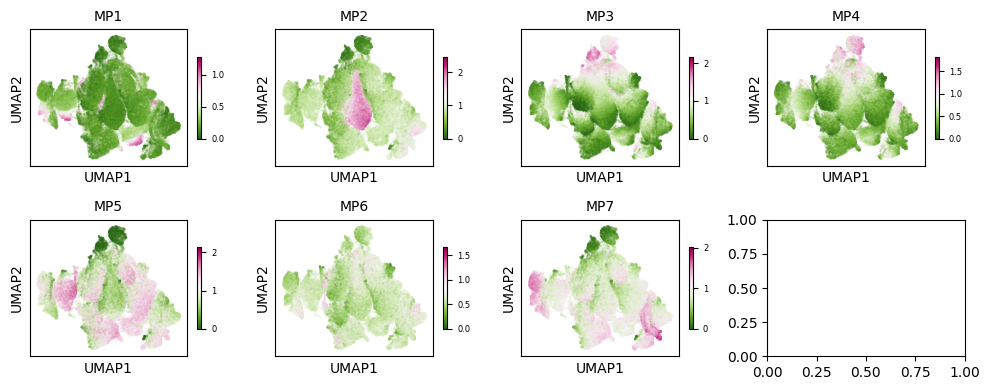

In [415]:
# Create a figure and axis
fig, ax = plt.subplots(2, 4, figsize=(10,4))
for i in range(7):
    tp = ax[i//4][i%4].scatter(adata_nr.obsm["X_umap"][:,0],adata_nr.obsm["X_umap"][:,1], c=adata_nr.obs["MP"+str(i+1)], s=.005, 
                cmap='PiYG_r', rasterized=True)
    ax[i//4][i%4].set_title("MP"+str(i+1))
    ax[i//4][i%4].set_xticks([])
    ax[i//4][i%4].set_yticks([])
    ax[i//4][i%4].set_xlabel("UMAP1")
    ax[i//4][i%4].set_ylabel("UMAP2")

    cbar = plt.colorbar(tp, ax=ax[i//4][i%4], shrink=0.6)
    cbar.ax.tick_params(labelsize=6) 
plt.tight_layout()
plt.savefig("mel_figures/figure_2/2D_Kinomo_umaps.pdf", dpi=300, bbox_inches='tight')

In [29]:
mp_origin = []
view = []
for mp in kinomo.columns:
    mp_origin +=[mp for i in range(len([i for i in kinomo[mp] if not pd.isna(i) and i in all_delta_eta.index]))]
    view += [i for i in kinomo[mp] if not pd.isna(i) and i in all_delta_eta.index]

In [35]:
mp_palette = {
    'MP1': '#1f77b4',  # blue
    'MP2': '#ff7f0e',  # orange
    'MP3': '#2ca02c',  # green
    'MP4': '#d62728',  # red
    'MP5': '#9467bd',  # purple
    'MP6': '#8c564b',  # brown
    'MP7': '#17becf'   # cyan
}

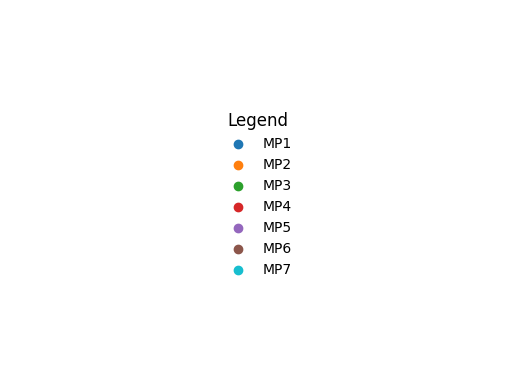

In [98]:
for i, (label, color) in enumerate(mp_palette.items()):
    plt.scatter([], [], color=color, label=label)
plt.legend(title="Legend", loc='center', frameon=False, ncol=1, fontsize=10, title_fontsize=12)
plt.axis('off')
plt.savefig("mel_figures/figure_2/MP_legeld.pdf", bbox_inches='tight')

In [100]:
gr_pal = {"growing":"red","shrinking":"green","stable":"grey"}

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


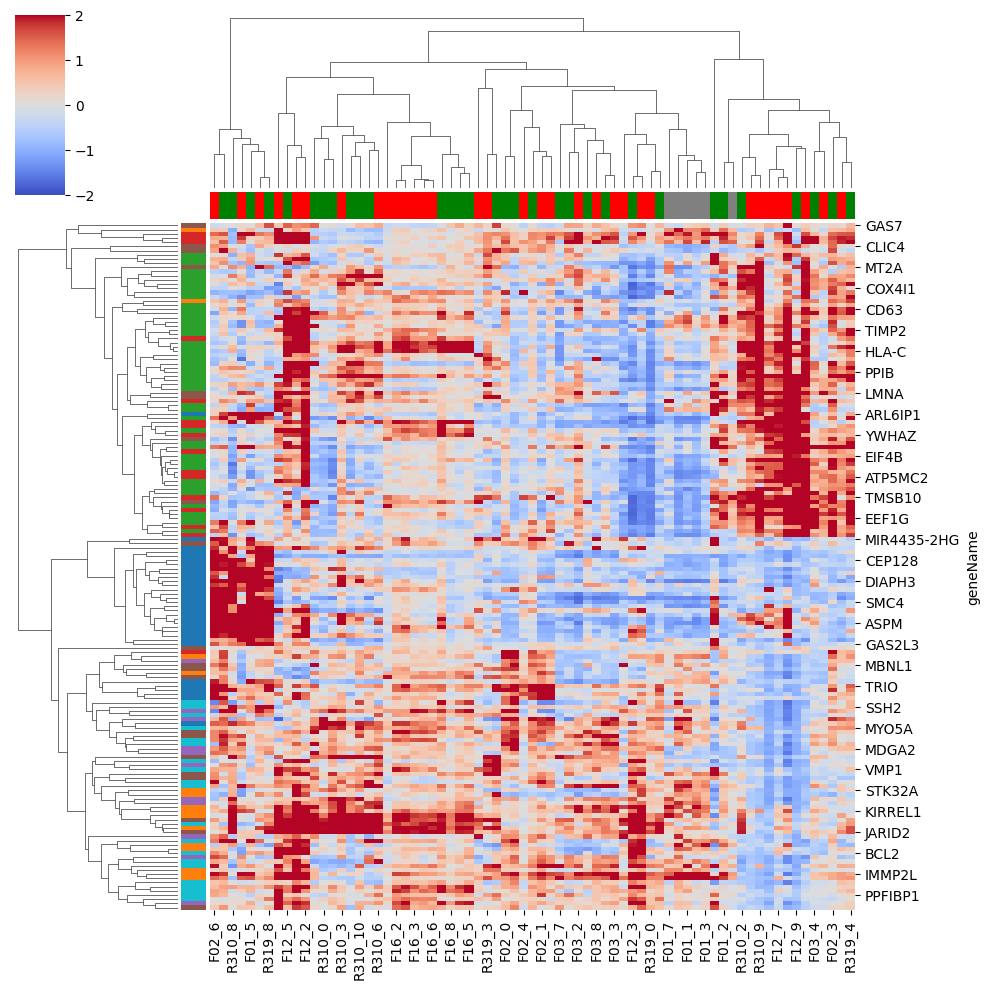

In [101]:
cl = sns.clustermap(all_delta_eta.loc[view], cmap='coolwarm', vmax=2, vmin=-2, row_colors=[mp_palette[i] for i in mp_origin], 
               col_colors = [gr_pal[i] for i in status.loc[all_delta_eta.columns][0]], metric='correlation')
plt.savefig("mel_figures/figure_2/MP_etas.pdf", bbox_inches='tight')

In [91]:
clin = pd.read_csv('clin.csv')
clin.index = clin["sample"]
clin = clin.drop_duplicates()

import os
PATH = "hmm_all_pt/"
cl_treat = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        obs = X.obs
        for cl in np.unique(obs["leiden"]):
            sampl = pd.DataFrame(np.unique(obs[obs['leiden']==cl]["sample"], return_counts=True)).T.sort_values(by=1, ascending=False).iloc[0][0]
            cl_treat[patient+"_"+str(cl)] = [clin.loc[sampl]["treated"]]
cl_treat = cl_treat.T

PATH = "hmm_all_pt/"
cl_r = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        obs = X.obs
        for cl in np.unique(obs["leiden"]):
            sampl = pd.DataFrame(np.unique(obs[obs['leiden']==cl]["sample"], return_counts=True)).T.sort_values(by=1, ascending=False).iloc[0][0]
            cl_r[patient+"_"+str(cl)] = [clin.loc[sampl]["responder"]]
cl_r = cl_r.T

In [105]:
r_pal = {"Responder":"limegreen","Non-responder":"pink"}

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


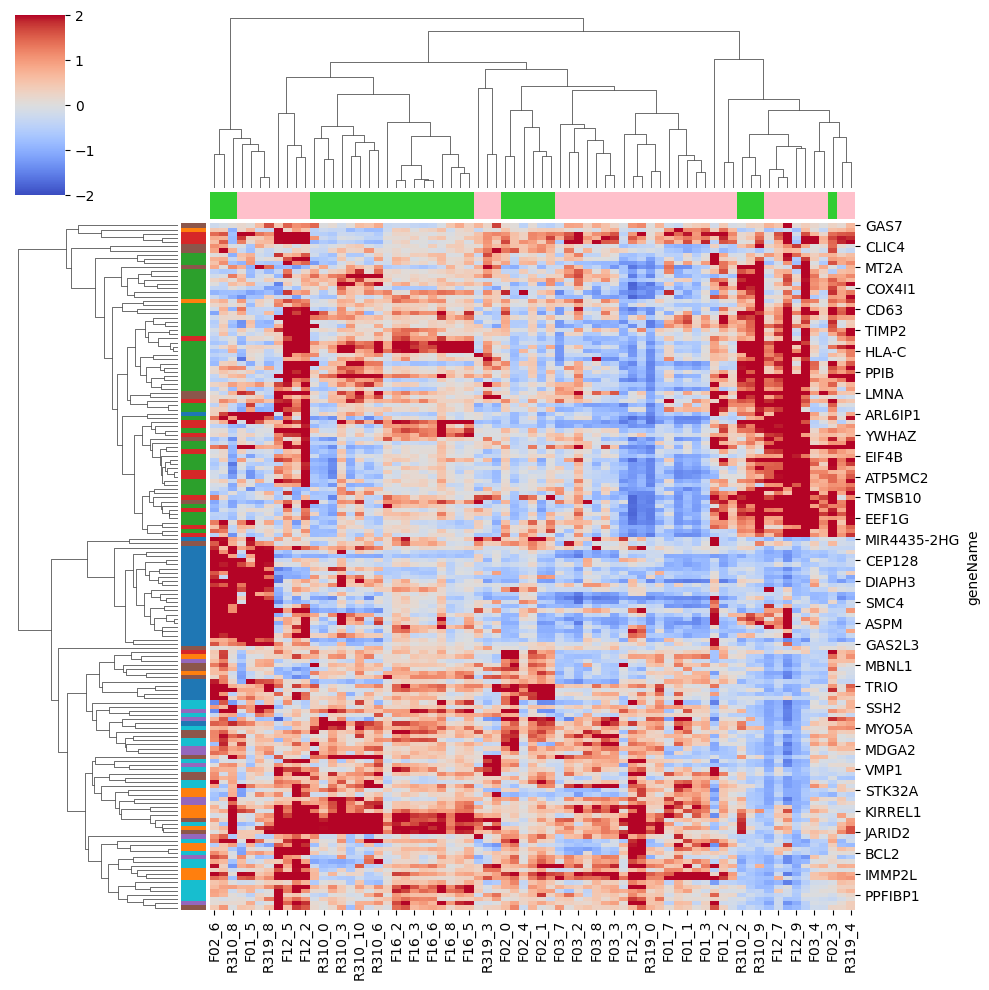

In [106]:
cl = sns.clustermap(all_delta_eta.loc[view], cmap='coolwarm', vmax=2, vmin=-2, row_colors=[mp_palette[i] for i in mp_origin], 
               col_colors = [r_pal[i] for i in cl_r.loc[all_delta_eta.columns][0]], metric='correlation')
plt.savefig("mel_figures/figure_2/MP_etas_RNR.pdf", bbox_inches='tight')

In [126]:
pal = {
'F01': '#8B5CF6',  # Purple
'F02': '#EC4899',  # Pink
'F03': '#14B8A6',  # Teal
'F04': '#F97316',  # Orange
'F05': '#9333EA',  # Dark Purple
'F06': '#DB2777',  # Dark Pink
'F07': '#0D9488',  # Deep Teal
'F08': '#EA580C',  # Deep Orange
'F09': '#7C3AED',  # Violet
'F12': '#BE185D',  # Magenta
'F15': '#0891B2',  # Cyan-Teal
'F16': '#C2410C',  # Burnt Orange
'F17': '#A855F7',  # Medium Purple
'F18': '#F43F5E',  # Bright Red-Pink
'F20': '#10B981',  # Green-Teal
'F22': '#D97706',  # Gold-Orange
'F23': '#6D28D9',  # Rich Indigo
'F26': '#F87171',  # Coral Red
'F27': '#34D399',  # Soft Green
'F28': '#F59E0B',  # Golden Yellow
'F29': '#6366F1',  # Blue-Purple
'F30': '#EF4444',  # Bright Red
'F31': '#22C55E',  # Bright Green
'R294': '#4C1D95',  # Deep Indigo
'R310': '#DB2777',  # Deep Pink
'R319': '#0EA5E9',  # Bright Cyan
'R328': '#FACC15',  # Vibrant Yellow
'R329': '#9333EA',  # Dark Purple
'R334': '#16A34A',  # Emerald Green
'R354': '#E11D48',  # Deep Rose
}

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


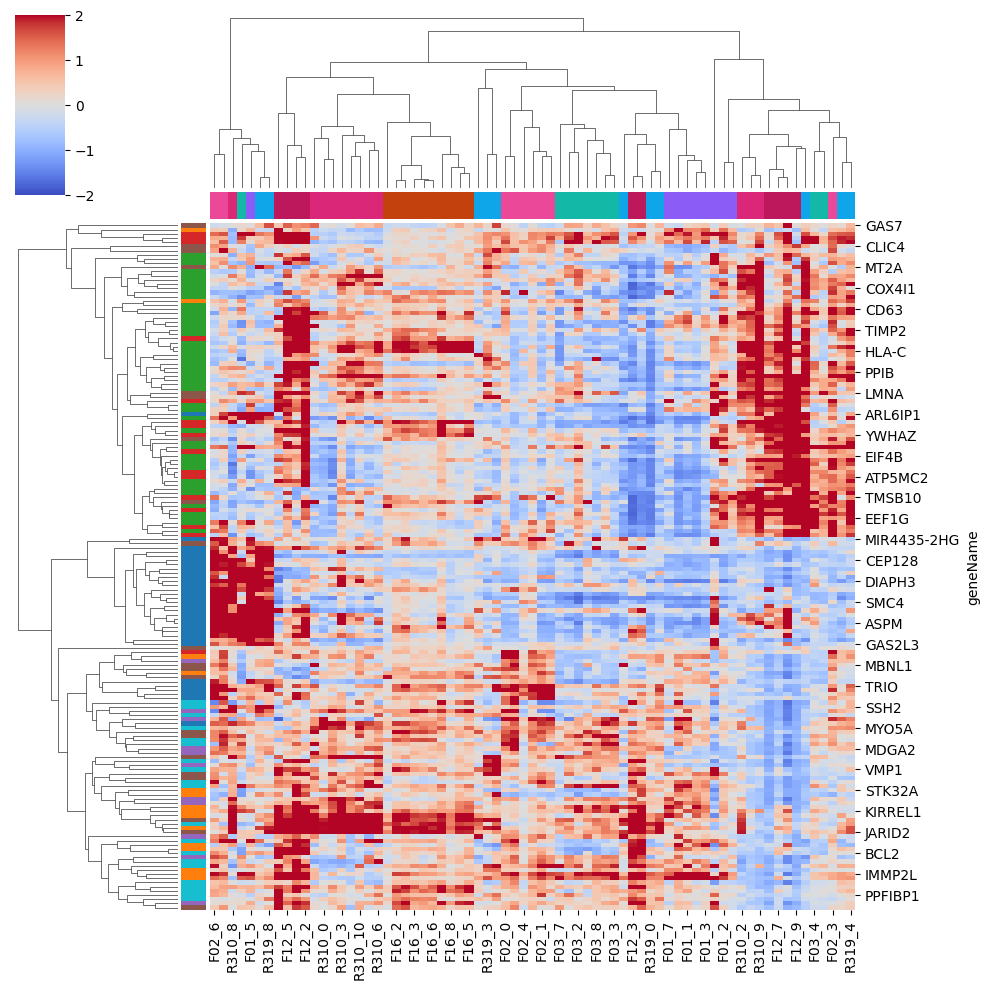

In [129]:
cl = sns.clustermap(all_delta_eta.loc[view], cmap='coolwarm', vmax=2, vmin=-2, row_colors=[mp_palette[i] for i in mp_origin], 
               col_colors = [pal[i.split("_")[0]] for i in all_delta_eta.columns], metric='correlation')
plt.savefig("mel_figures/figure_2/MP_etas_patient.pdf", bbox_inches='tight')

In [120]:
corrs = {}
for col in kinomo.columns:
    corr = []
    for i in range(len(list(kinomo[col].dropna()))):
        gene = list(kinomo[col].dropna())[i]
        if gene in all_delta_eta.index:
            corr.append(scipy.stats.pearsonr(all_delta_eta.loc[gene], exp.loc[gene][all_delta_eta.columns])[0])
    corrs[col]=corr

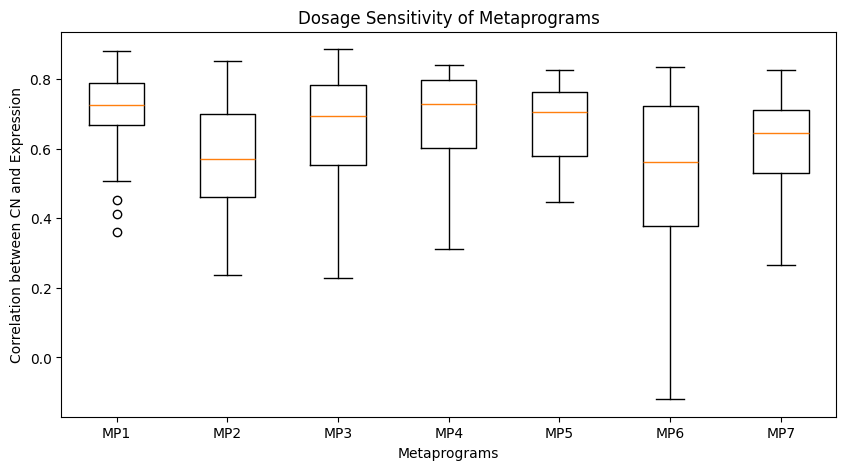

In [124]:
labels = list(corrs.keys())
values = [corrs[k] for k in labels]

# Create boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(values, labels=labels)
plt.xlabel("Metaprograms")
plt.ylabel("Correlation between CN and Expression")
plt.title("Dosage Sensitivity of Metaprograms")
plt.savefig("mel_figures/figure_2/MP_dosage_sensitivity.pdf", bbox_inches='tight')

In [85]:
row_inds = np.asarray(view)[cl.dendrogram_row.reordered_ind]

In [86]:
col_inds = all_delta_eta.columns[cl.dendrogram_col.reordered_ind]

<Axes: ylabel='geneName'>

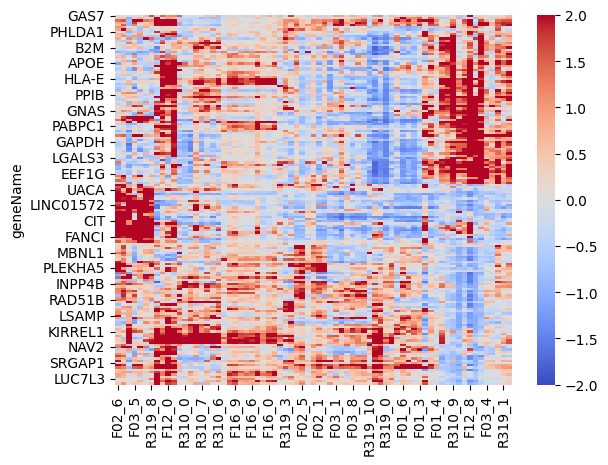

In [87]:
sns.heatmap(all_delta_eta.loc[row_inds][all_delta_eta.columns[cl.dendrogram_col.reordered_ind]],
           cmap='coolwarm', vmax=2, vmin=-2)

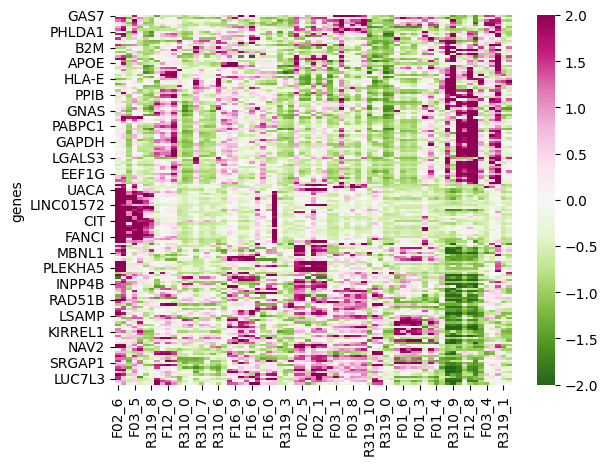

In [125]:
sns.heatmap(scipy.stats.zscore(exp.loc[row_inds][col_inds],axis=1),
           cmap='PiYG_r', vmax=2, vmin=-2)
plt.savefig("mel_figures/figure_2/MP_exp.pdf", bbox_inches='tight')

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


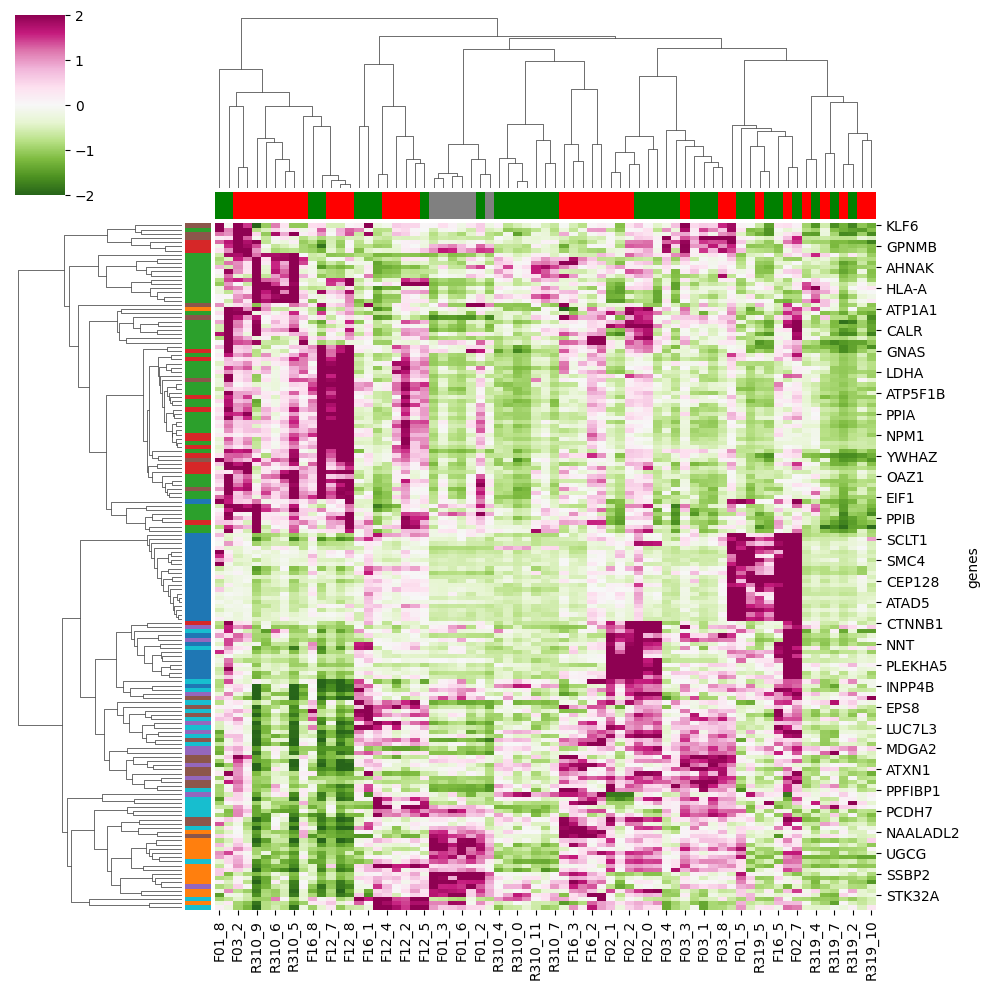

In [60]:
cl = sns.clustermap(scipy.stats.zscore(exp.loc[view], axis=1), cmap='PiYG_r', vmax=2, vmin=-2, row_colors=[mp_palette[i] for i in mp_origin], 
               col_colors = [gr_pal[i] for i in status.loc[all_delta_eta.columns][0]], metric='correlation')

In [136]:
RNR_DEGs = [
    "TTC3", "ICE1", "DROSHA", "ZFAND6", "WAC", "WDFY2", "MAPK14", "SUCLG2", "C5orf34",
    "ARHGAP12", "ZNF318", "CMTR1", "INPP4B", "PRKAA1", "HMG20A", "IREB2", "SLTM", "CARS2",
    "SKP2", "OTUD4", "NUDCD3", "COA1", "MPLKIP", "URGCP", "E2F5", "RPRD2", "PHF14", "CDK13",
    "TBRG4", "SETDB1", "SPIDR", "DAP3", "LINC00907", "NAV3", "PPP2R2A", "FLAD1", "PIP5K1A",
    "ASH1L", "NDUFA9", "YY1AP1"
]

In [141]:
for MP in kinomo.columns:
    print(np.intersect1d(kinomo[MP].dropna(), RNR_DEGs))

['INPP4B']
[]
[]
[]
[]
[]
[]


## Back to cohort analysis

/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_3660/3299171242.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(adata_nr.obsm["X_umap"][:,0],adata_nr.obsm["X_umap"][:,1], c=[pal[i] for i in adata_nr.obs["sample"]], s=.05,


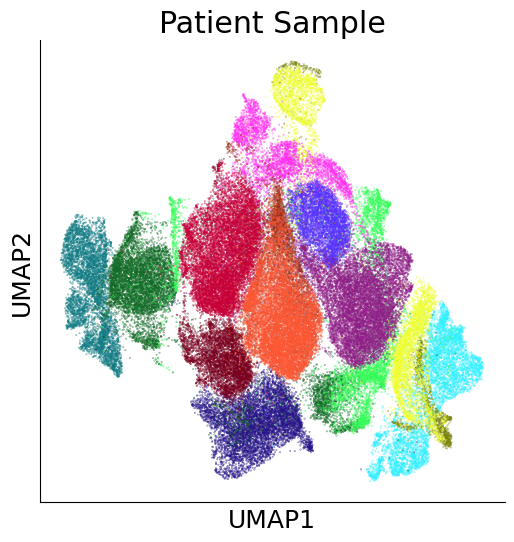

In [293]:
pal = {
    'F01_on': '#FF5733',  # Original bright orange
    'F01_pre': '#99301A',  # Darker burnt orange
    'F02_on': '#33FF57',  # Bright green
    'F02_pre': '#136B28',  # Dark forest green
    'F03_post1_on2': '#5733FF',  # Vivid blue
    'F03_post1_pre2': '#271587',  # Dark navy blue
    'F12_post': '#F0FF33',  # Bright yellow-green
    'F12_pre': '#7A850D',  # Olive green
    'F16_post1_pre2': '#33F0FF',  # Bright cyan
    'F16_pre': '#127C85',  # Deep teal
    'R310_on2': '#FF33F0',  # Bright magenta
    'R310_pre': '#8F1F87',  # Dark purple-pink
    'R319_on': '#C70039',  # Deep red
    'R319_pre': '#7A001E'  # Dark maroon
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(adata_nr.obsm["X_umap"][:,0],adata_nr.obsm["X_umap"][:,1], c=[pal[i] for i in adata_nr.obs["sample"]], s=.05, 
            cmap='PiYG_r', vmax=1, vmin=-1, rasterized=True)
plt.xticks([])
plt.yticks([])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("Patient Sample")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("mel_figures/2b_sample.pdf", dpi=300, bbox_inches='tight')

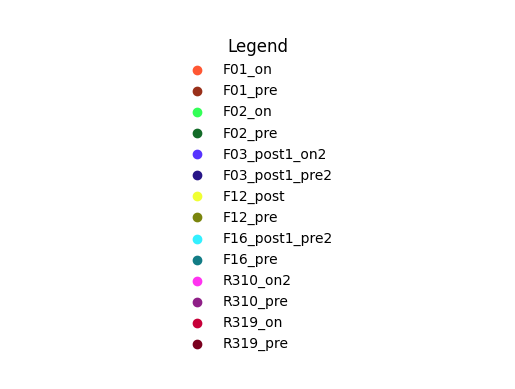

In [298]:
for i, (label, color) in enumerate(pal.items()):
    plt.scatter([], [], color=color, label=label)
    
plt.legend(title="Legend", loc='center', frameon=False, ncol=1, fontsize=10, title_fontsize=12)
plt.axis('off')
plt.savefig("mel_figures/sample_legend.pdf", bbox_inches='tight')

In [139]:
a = [i for i in a if i not in np.intersect1d(a, b)]
b = [i for i in b if i not in np.intersect1d(a, b)]
save = pd.DataFrame(a+b)
save["source"] = ["growing" for i in range(len(a))]+["shrinking" for i in range(len(b))]
save.to_csv("mel_expansion_contraction_sigs_shared2p.csv")

In [370]:
def enrich_sig(a):
    #adapted from https://davidbioinformatics.nih.gov/helps/functional_annotation.html
    res = pd.DataFrame()
    frac = []
    for s in wouters.columns:
        sig = [i for i in wouters[s] if not pd.isna(i)]
        
        lh = len(np.intersect1d(a, sig)) #number of signature genes in query list
        lt = len(sig) #length of gene signature
        ph = len(np.intersect1d(sig, exp_norm.index)) #number of signature genes in full data
        pt = exp_norm.shape[0] #length of full data
        
        table = [[lh, ph-lh],[lt-lh,pt-lt-(ph-lh)]]
        frac.append(lh/len(a))
        res = pd.concat((res, pd.DataFrame({s:scipy.stats.fisher_exact(table)})),axis=1)
    res = res.T
    res.columns = ["statistic","p-val"]
    res["frac"] = frac
    
    from statsmodels.stats.multitest import multipletests
    
    # Example p-values
    p_values = res["p-val"]
    
    # Bonferroni correction
    _, p_bonf, _, _ = multipletests(p_values, method='fdr_bh')
    res["p-val-adj"] = p_bonf
    return res

In [137]:
gr_res = enrich_sig(a)

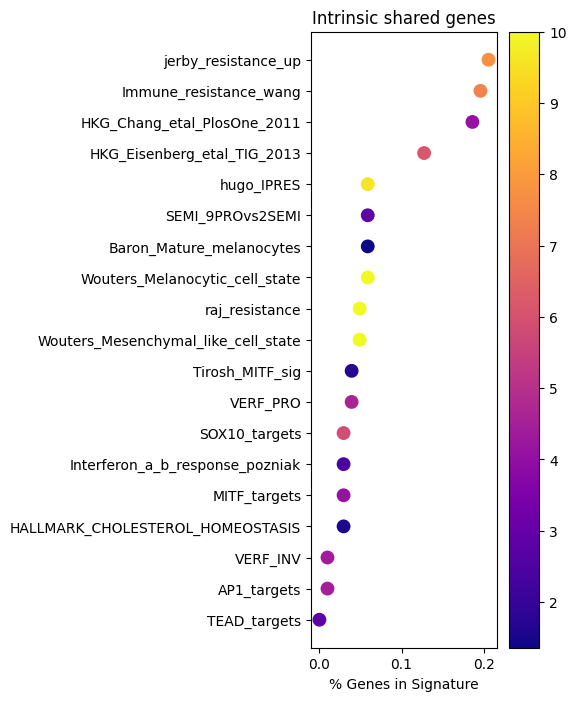

In [236]:
plt.figure(figsize=(3,8))
plot = gr_res[gr_res["p-val-adj"]<.05].sort_values(by='frac')
plot = plot.loc[[i for i in plot.index if "KEGG" not in i]]
plt.scatter(plot['frac'],[i for i in range(plot.shape[0])], c=-np.log10(plot["p-val-adj"]), s=80, vmax=10, cmap="plasma")
plt.yticks([i for i in range(plot.shape[0])], plot.index)
plt.title("Intrinsic shared genes")
plt.xlabel("% Genes in Signature")
plt.colorbar()
plt.savefig("mel_figures/2f.pdf", bbox_inches="tight")

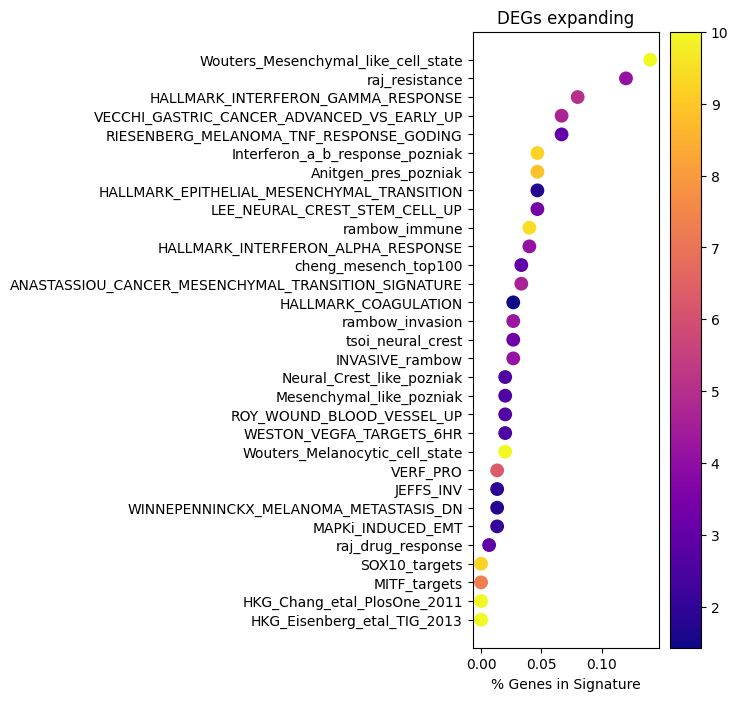

In [1771]:
plt.figure(figsize=(3,8))
plot = deg_res[deg_res["p-val-adj"]<.05].sort_values(by='frac')
plot = plot.loc[[i for i in plot.index if "KEGG" not in i]]
plt.scatter(plot['frac'],[i for i in range(plot.shape[0])], c=-np.log10(plot["p-val-adj"]), s=80, vmax=10, cmap="plasma")
plt.yticks([i for i in range(plot.shape[0])], plot.index)
plt.title("DEGs expanding")
plt.xlabel("% Genes in Signature")
plt.colorbar()

In [508]:
deg_res = enrich_sig(count_degs_growing[count_degs_growing[1]>4][0])

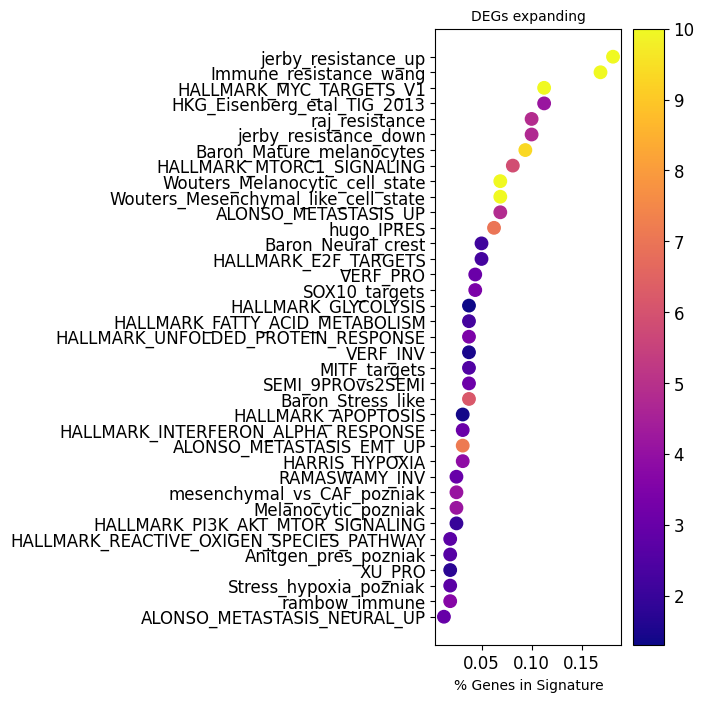

In [517]:
plt.figure(figsize=(3,8))
plot = deg_res[deg_res["p-val-adj"]<.05].sort_values(by='frac')
plot = plot.loc[[i for i in plot.index if "KEGG" not in i]]
plt.scatter(plot['frac'],[i for i in range(plot.shape[0])], c=-np.log10(plot["p-val-adj"]), s=80, vmax=10, cmap="plasma")
plt.yticks([i for i in range(plot.shape[0])], plot.index)
plt.title("DEGs expanding")
plt.xlabel("% Genes in Signature")
plt.colorbar()
plt.savefig("mel_figures/figure_2/S2b_dots.pdf", bbox_inches="tight")

In [1733]:
sh_res = enrich_sig(b)

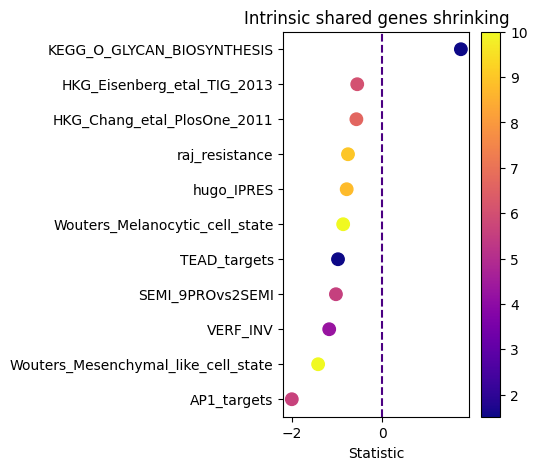

In [1734]:
plt.figure(figsize=(3,5))
plot = sh_res[sh_res["p-val-adj"]<.05].sort_values(by='statistic')
plt.scatter(np.log10(plot["statistic"]+.01),[i for i in range(plot.shape[0])], c=-np.log10(plot["p-val-adj"]), s=80, vmax=10, cmap="plasma")
plt.yticks([i for i in range(plot.shape[0])], plot.index)
plt.title("Intrinsic shared genes shrinking")
plt.axvline(0, c='indigo', linestyle='--')
plt.xlabel("Statistic")
plt.colorbar()

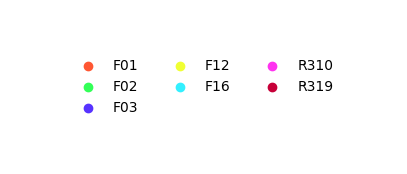

In [305]:
# Create the legend
plt.figure(figsize=(5, 2))

pal = {
     'F01': '#FF5733',
     'F02': '#33FF57',
     'F03': '#5733FF',
     'F12': '#F0FF33',
     'F16': '#33F0FF',
     'R310': '#FF33F0',
     'R319': '#C70039'
    }
#pal = {"growing":"red","shrinking":"green","stable":"grey"}
#pal = {"Treated":"pink","Untreated":"teal"}
#pal = {"Non-responder":"violet","Responder":"lime"}
#pal = {"nan":"grey","treated_combination":"coral", "treated_individual":"dodgerblue"}


for i, (label, color) in enumerate(pal.items()):
    plt.scatter([], [], color=color, label=label)

plt.legend(title="", loc='center', frameon=False, ncol=3, fontsize=10, title_fontsize=12)
plt.axis('off')
plt.savefig("mel_figures/pt_legend.pdf")

In [1586]:
a = [i for i in a if i not in np.intersect1d(a, b)]
b = [i for i in b if i not in np.intersect1d(a, b)]
save = pd.DataFrame(a+b)
save["source"] = ["growing" for i in range(len(a))]+["shrinking" for i in range(len(b))]
save.to_csv("mel_expansion_contraction_sigs_lfc.csv")